***
# Supervised Learning : Exploring Penalized Models for Predicting Numeric Responses

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *November 16, 2023*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Cleaning](#1.4.1)
        * [1.4.2 Missing Data Imputation](#1.4.2)
        * [1.4.3 Outlier Treatment](#1.4.3)
        * [1.4.4 Collinearity](#1.4.4)
        * [1.4.5 Shape Transformation](#1.4.5)
        * [1.4.6 Centering and Scaling](#1.4.6)
        * [1.4.7 Data Encoding](#1.4.7)
        * [1.4.8 Preprocessed Data Description](#1.4.8)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Model Development](#1.6)
        * [1.6.1 Premodelling Data Description](#1.6.1)
        * [1.6.2 Linear Regression](#1.6.2)
        * [1.6.3 Polynomial Regression](#1.6.3)
        * [1.6.4 Ridge Regression](#1.6.4)
        * [1.6.5 Least Absolute Shrinkage and Selection Operator Regression](#1.6.5)
        * [1.6.6 Elastic Net Regression](#1.6.6)
    * [1.7 Consolidated Findings](#1.7)   
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project implements different penalized regression modelling procedures for numeric responses using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark>. Models applied in the analysis to predict numeric responses included the **Linear Regression**, **Polynomial Regression**, **Ridge Regression**, **Least Absolute Shrinkage and Selection Operator Regression** and **Elastic Net Regression** algorithms. The resulting predictions derived from the candidate models were evaluated in terms of their model fit using the r-squared, mean squared error (MSE) and mean absolute error (MAE) metrics. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document.

[Penalized regression](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is a form of variable selection method aimed at reducing model complexity by seeking a smaller subset of informative variables. This process keeps all the predictor variables in the model but constrains (regularizes) the regression coefficients by shrinking them toward zero, in addition to setting some coefficients exactly equal to zero, and is directly built as extensions of standard regression coefficient estimation by incorporating a penalty in the loss function. The algorithms applied in this study attempt to evaluate various penalties for over-confidence in the parameter estimates and accept a slightly worse fit in order to have a more parsimonious model.

## 1.1. Data Background <a class="anchor" id="1.1"></a>

Datasets used for the analysis were separately gathered and consolidated from various sources including: 
1. Cancer Rates from [World Population Review](https://worldpopulationreview.com/country-rankings/cancer-rates-by-country)
2. Social Protection and Labor Indicator from [World Bank](https://data.worldbank.org/topic/social-protection-and-labor?view=chart)
3. Education Indicator from [World Bank](https://data.worldbank.org/topic/education?view=chart)
4. Economy and Growth Indicator from [World Bank](https://data.worldbank.org/topic/economy-and-growth?view=chart)
5. Environment Indicator from [World Bank](https://data.worldbank.org/topic/environment?view=chart)
6. Climate Change Indicator from [World Bank](https://data.worldbank.org/topic/climate-change?view=chart)
7. Agricultural and Rural Development Indicator from [World Bank](https://data.worldbank.org/topic/agriculture-and-rural-development?view=chart)
8. Social Development Indicator from [World Bank](https://data.worldbank.org/topic/social-development?view=chart)
9. Health Indicator from [World Bank](https://data.worldbank.org/topic/health?view=chart)
10. Science and Technology Indicator from [World Bank](https://data.worldbank.org/topic/science-and-technology?view=chart)
11. Urban Development Indicator from [World Bank](https://data.worldbank.org/topic/urban-development?view=chart)
12. Human Development Indices from [Human Development Reports](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI)
13. Environmental Performance Indices from [Yale Center for Environmental Law and Policy](https://epi.yale.edu/epi-results/2022/component/epi)

This study hypothesized that various global development indicators and indices influence cancer rates across countries.

The target variable for the study is:
* <span style="color: #FF0000">CANRAT</span> - Age-standardized cancer rates, per 100K population (2022)

The predictor variables for the study are:
* <span style="color: #FF0000">GDPPER</span> - GDP per person employed, current US Dollars (2020)
* <span style="color: #FF0000">URBPOP</span> - Urban population, % of total population (2020)
* <span style="color: #FF0000">PATRES</span> - Patent applications by residents, total count (2020)
* <span style="color: #FF0000">RNDGDP</span> - Research and development expenditure, % of GDP (2020)
* <span style="color: #FF0000">POPGRO</span> - Population growth, annual % (2020)
* <span style="color: #FF0000">LIFEXP</span> - Life expectancy at birth, total in years (2020)
* <span style="color: #FF0000">TUBINC</span> - Incidence of tuberculosis, per 100K population (2020)
* <span style="color: #FF0000">DTHCMD</span> - Cause of death by communicable diseases and maternal, prenatal and nutrition conditions,  % of total (2019)
* <span style="color: #FF0000">AGRLND</span> - Agricultural land,  % of land area (2020)
* <span style="color: #FF0000">GHGEMI</span> - Total greenhouse gas emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">RELOUT</span> - Renewable electricity output, % of total electricity output (2015)
* <span style="color: #FF0000">METEMI</span> - Methane emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">FORARE</span> - Forest area, % of land area (2020)
* <span style="color: #FF0000">CO2EMI</span> - CO2 emissions, metric tons per capita (2020)
* <span style="color: #FF0000">PM2EXP</span> - PM2.5 air pollution, population exposed to levels exceeding WHO guideline value,  % of total (2017)
* <span style="color: #FF0000">POPDEN</span> - Population density, people per sq. km of land area (2020)
* <span style="color: #FF0000">GDPCAP</span> - GDP per capita, current US Dollars (2020)
* <span style="color: #FF0000">ENRTER</span> - Tertiary school enrollment, % gross (2020)
* <span style="color: #FF0000">HDICAT</span> - Human development index, ordered category (2020)
* <span style="color: #FF0000">EPISCO</span> - Environment performance index , score (2022)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **177 rows** (observations)
    * **22 columns** (variables)
        * **1/22 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/22 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **19/22 predictor** (numeric)
             * <span style="color: #FF0000">GDPPER</span>
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">PATRES</span>
             * <span style="color: #FF0000">RNDGDP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">RELOUT</span>
             * <span style="color: #FF0000">METEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">ENRTER</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/22 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
%matplotlib inline

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler
from scipy import stats

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline

In [2]:
##################################
# Setting Global Options
##################################
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format

In [3]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"

In [4]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
cancer_rate = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "NumericCancerRates.csv"))

In [5]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate.shape)

Dataset Dimensions: 


(177, 22)

In [6]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate.dtypes)

Column Names and Data Types:


COUNTRY     object
CANRAT     float64
GDPPER     float64
URBPOP     float64
PATRES     float64
RNDGDP     float64
POPGRO     float64
LIFEXP     float64
TUBINC     float64
DTHCMD     float64
AGRLND     float64
GHGEMI     float64
RELOUT     float64
METEMI     float64
FORARE     float64
CO2EMI     float64
PM2EXP     float64
POPDEN     float64
ENRTER     float64
GDPCAP     float64
HDICAT      object
EPISCO     float64
dtype: object

In [7]:
##################################
# Taking a snapshot of the dataset
##################################
cancer_rate.head()

,COUNTRY,CANRAT,GDPPER,URBPOP,PATRES,RNDGDP,POPGRO,LIFEXP,TUBINC,DTHCMD,...,RELOUT,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,ENRTER,GDPCAP,HDICAT,EPISCO
0,Australia,452.4000,98380.6360,86.2410,2368.0000,NaN,1.2357,83.2000,7.2000,4.9411,...,13.6378,131484.7632,17.4213,14.7727,24.8936,3.3353,110.1392,51722.0690,VH,60.1000
1,New Zealand,422.9000,77541.7644,86.6990,348.0000,NaN,2.2048,82.2561,7.2000,4.3547,...,80.0814,32241.9370,37.5701,6.1608,NaN,19.3316,75.7348,41760.5948,VH,56.7000
2,Ireland,372.8000,198405.8750,63.6530,75.0000,1.2324,1.0291,82.5561,5.3000,5.6846,...,27.9654,15252.8246,11.3517,6.7682,0.2741,72.3673,74.6803,85420.1909,VH,57.4000
3,United States,362.2000,130941.6369,82.6640,269586.0000,3.4229,0.9643,76.9805,2.3000,5.3021,...,13.2286,748241.4029,33.8669,13.0328,3.3432,36.2410,87.5677,63528.6343,VH,51.1000
4,Denmark,351.1000,113300.6011,88.1160,1261.0000,2.9687,0.2916,81.6024,4.1000,6.8261,...,65.5059,7778.7739,15.7110,4.6912,56.9145,145.7851,82.6643,60915.4244,VH,77.9000


In [8]:
##################################
# Setting the levels of the categorical variables
##################################
cancer_rate['HDICAT'] = cancer_rate['HDICAT'].astype('category')
cancer_rate['HDICAT'] = cancer_rate['HDICAT'].cat.set_categories(['L', 'M', 'H', 'VH'], ordered=True)

In [9]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(cancer_rate.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
CANRAT,177.0000,183.8294,79.7434,78.4000,118.1000,155.3000,240.4000,452.4000
GDPPER,165.0000,45284.4243,39417.9404,1718.8049,13545.2545,34024.9009,66778.4160,234646.9049
URBPOP,174.0000,59.7881,22.8064,13.3450,42.4327,61.7015,79.1865,100.0000
PATRES,108.0000,20607.3889,134068.3101,1.0000,35.2500,244.5000,1297.7500,1344817.0000
RNDGDP,74.0000,1.1975,1.1900,0.0398,0.2564,0.8737,1.6088,5.3545
POPGRO,174.0000,1.1270,1.1977,-2.0793,0.2369,1.1800,2.0312,3.7271
LIFEXP,174.0000,71.7461,7.6062,52.7770,65.9075,72.4646,77.5235,84.5600
TUBINC,174.0000,105.0059,136.7229,0.7700,12.0000,44.5000,147.7500,592.0000
DTHCMD,170.0000,21.2605,19.2733,1.2836,6.0780,12.4563,36.9805,65.2079
AGRLND,174.0000,38.7935,21.7155,0.5128,20.1303,40.3866,54.0138,80.8411


In [10]:
##################################
# Performing a general exploration of the object variable
##################################
print('Object Variable Summary:')
display(cancer_rate.describe(include='object').transpose())

Object Variable Summary:


,count,unique,top,freq
COUNTRY,177,177,Australia,1


In [11]:
##################################
# Performing a general exploration of the categorical variable
##################################
print('Categorical Variable Summary:')
display(cancer_rate.describe(include='category').transpose())

Categorical Variable Summary:


,count,unique,top,freq
HDICAT,167,4,VH,59


## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows observed.
2. Missing data noted for 20 variables with Null.Count>0 and Fill.Rate<1.0.
    * <span style="color: #FF0000">RNDGDP</span>: Null.Count = 103, Fill.Rate = 0.418
    * <span style="color: #FF0000">PATRES</span>: Null.Count = 69, Fill.Rate = 0.610
    * <span style="color: #FF0000">ENRTER</span>: Null.Count = 61, Fill.Rate = 0.655
    * <span style="color: #FF0000">RELOUT</span>: Null.Count = 24, Fill.Rate = 0.864
    * <span style="color: #FF0000">GDPPER</span>: Null.Count = 12, Fill.Rate = 0.932
    * <span style="color: #FF0000">EPISCO</span>: Null.Count = 12, Fill.Rate = 0.932
    * <span style="color: #FF0000">HDICAT</span>: Null.Count = 10, Fill.Rate = 0.943
    * <span style="color: #FF0000">PM2EXP</span>: Null.Count = 10, Fill.Rate = 0.943
    * <span style="color: #FF0000">DTHCMD</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">METEMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">CO2EMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">GDPCAP</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">GHGEMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">FORARE</span>: Null.Count = 4, Fill.Rate = 0.977
    * <span style="color: #FF0000">TUBINC</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">AGRLND</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">POPGRO</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">POPDEN</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">URBPOP</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">LIFEXP</span>: Null.Count = 3, Fill.Rate = 0.983
3. 120 observations noted with at least 1 missing data. From this number, 14 observations reported high Missing.Rate>0.2.
    * <span style="color: #FF0000">COUNTRY=Guadeloupe</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=Martinique</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=French Guiana</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=New Caledonia</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=French Polynesia</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.409
    * <span style="color: #FF0000">COUNTRY=North Korea</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Somalia</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Venezuela</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Libya</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Eritrea</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Yemen</span>: Missing.Rate= 0.227
4. Low variance observed for 1 variable with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">PM2EXP</span>: First.Second.Mode.Ratio = 53.000
5. No low variance observed for any variable with Unique.Count.Ratio>10.
6. High skewness observed for 5 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">POPDEN</span>: Skewness = +10.267
    * <span style="color: #FF0000">GHGEMI</span>: Skewness = +9.496
    * <span style="color: #FF0000">PATRES</span>: Skewness = +9.284
    * <span style="color: #FF0000">METEMI</span>: Skewness = +5.801
    * <span style="color: #FF0000">PM2EXP</span>: Skewness = -3.141

In [12]:
##################################
# Counting the number of duplicated rows
##################################
cancer_rate.duplicated().sum()

np.int64(0)

In [13]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cancer_rate.dtypes)

In [14]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cancer_rate.columns)

In [15]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cancer_rate)] * len(cancer_rate.columns))

In [16]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cancer_rate.isna().sum(axis=0))

In [17]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cancer_rate.count())

In [18]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [19]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,COUNTRY,object,177,177,0,1.0000
1,CANRAT,float64,177,177,0,1.0000
2,GDPPER,float64,177,165,12,0.9322
3,URBPOP,float64,177,174,3,0.9831
4,PATRES,float64,177,108,69,0.6102
5,RNDGDP,float64,177,74,103,0.4181
6,POPGRO,float64,177,174,3,0.9831
7,LIFEXP,float64,177,174,3,0.9831
8,TUBINC,float64,177,174,3,0.9831
9,DTHCMD,float64,177,170,7,0.9605


In [20]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])

20

In [21]:
##################################
# Identifying the columns
# with Fill.Rate < 1.00
##################################
display(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)].sort_values(by=['Fill.Rate'], ascending=True))

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
5,RNDGDP,float64,177,74,103,0.4181
4,PATRES,float64,177,108,69,0.6102
18,ENRTER,float64,177,116,61,0.6554
12,RELOUT,float64,177,153,24,0.8644
21,EPISCO,float64,177,165,12,0.9322
2,GDPPER,float64,177,165,12,0.9322
16,PM2EXP,float64,177,167,10,0.9435
20,HDICAT,category,177,167,10,0.9435
15,CO2EMI,float64,177,170,7,0.9605
13,METEMI,float64,177,170,7,0.9605


In [22]:
##################################
# Identifying the rows
# with Fill.Rate < 0.90
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]

In [23]:
##################################
# Gathering the metadata labels for each observation
##################################
row_metadata_list = cancer_rate["COUNTRY"].values.tolist()

In [24]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(cancer_rate.columns)] * len(cancer_rate))

In [25]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(cancer_rate.isna().sum(axis=1))

In [26]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [27]:
##################################
# Identifying the rows
# with missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

,Row.Name,Column.Count,Null.Count,Missing.Rate
0,Australia,22,1,0.0455
1,New Zealand,22,2,0.0909
2,Ireland,22,0,0.0000
3,United States,22,0,0.0000
4,Denmark,22,0,0.0000
...,...,...,...,...
172,Congo Republic,22,3,0.1364
173,Bhutan,22,2,0.0909
174,Nepal,22,2,0.0909
175,Gambia,22,4,0.1818


In [28]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.00
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])

120

In [29]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.20
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)])

14

In [30]:
##################################
# Identifying the rows
# with Missing.Rate > 0.20
##################################
row_high_missing_rate = all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)]

In [31]:
##################################
# Identifying the rows
# with Missing.Rate > 0.20
##################################
display(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)].sort_values(by=['Missing.Rate'], ascending=False))

,Row.Name,Column.Count,Null.Count,Missing.Rate
35,Guadeloupe,22,20,0.9091
39,Martinique,22,20,0.9091
56,French Guiana,22,20,0.9091
13,New Caledonia,22,11,0.5000
44,French Polynesia,22,11,0.5000
75,Guam,22,11,0.5000
53,Puerto Rico,22,9,0.4091
85,North Korea,22,6,0.2727
168,South Sudan,22,6,0.2727
132,Somalia,22,6,0.2727


In [32]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
cancer_rate_numeric = cancer_rate.select_dtypes(include='number')

In [33]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = cancer_rate_numeric.columns

In [34]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = cancer_rate_numeric.min()

In [35]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = cancer_rate_numeric.mean()

In [36]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = cancer_rate_numeric.median()

In [37]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = cancer_rate_numeric.max()

In [38]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [cancer_rate[x].value_counts(dropna=True).index.tolist()[0] for x in cancer_rate_numeric]

In [39]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [cancer_rate[x].value_counts(dropna=True).index.tolist()[1] for x in cancer_rate_numeric]

In [40]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [cancer_rate_numeric[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_numeric]

In [41]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [cancer_rate_numeric[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_numeric]

In [42]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [43]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = cancer_rate_numeric.nunique(dropna=True)

In [44]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(cancer_rate_numeric)] * len(cancer_rate_numeric.columns))

In [45]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [46]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cancer_rate_numeric.skew()

In [47]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = cancer_rate_numeric.kurtosis()

In [48]:
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,CANRAT,78.4000,183.8294,155.3000,452.4000,135.3000,130.6000,3,2,1.5000,167,177,0.9435,0.8818,0.0635
1,GDPPER,1718.8049,45284.4243,34024.9009,234646.9049,98380.6360,77541.7644,1,1,1.0000,165,177,0.9322,1.5176,3.4720
2,URBPOP,13.3450,59.7881,61.7015,100.0000,100.0000,86.6990,2,1,2.0000,173,177,0.9774,-0.2107,-0.9628
3,PATRES,1.0000,20607.3889,244.5000,1344817.0000,6.0000,2.0000,4,3,1.3333,97,177,0.5480,9.2844,91.1872
4,RNDGDP,0.0398,1.1975,0.8737,5.3545,1.2324,3.4229,1,1,1.0000,74,177,0.4181,1.3967,1.6960
5,POPGRO,-2.0793,1.1270,1.1800,3.7271,1.2357,2.2048,1,1,1.0000,174,177,0.9831,-0.1952,-0.4236
6,LIFEXP,52.7770,71.7461,72.4646,84.5600,83.2000,82.2561,1,1,1.0000,174,177,0.9831,-0.3580,-0.6496
7,TUBINC,0.7700,105.0059,44.5000,592.0000,12.0000,4.1000,4,3,1.3333,131,177,0.7401,1.7463,2.4294
8,DTHCMD,1.2836,21.2605,12.4563,65.2079,4.9411,4.3547,1,1,1.0000,170,177,0.9605,0.9005,-0.6915
9,AGRLND,0.5128,38.7935,40.3866,80.8411,46.2525,38.5629,1,1,1.0000,174,177,0.9831,0.0740,-0.9262


In [49]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])

1

In [50]:
##################################
# Identifying the numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
15,PM2EXP,0.2741,91.9406,100.0000,100.0000,100.0000,100.0000,106,2,53.0000,61,177,0.3446,-3.1416,9.0324


In [51]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [52]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

5

In [53]:
##################################
# Identifying the numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))].sort_values(by=['Skewness'], ascending=False))

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
16,POPDEN,2.1151,200.8868,77.9831,7918.9513,3.3353,19.3316,1,1,1.0000,174,177,0.9831,10.2678,119.9953
10,GHGEMI,179.7252,259582.7099,41009.2760,12942868.3400,571903.1199,80158.0258,1,1,1.0000,170,177,0.9605,9.4961,101.6373
3,PATRES,1.0000,20607.3889,244.5000,1344817.0000,6.0000,2.0000,4,3,1.3333,97,177,0.5480,9.2844,91.1872
12,METEMI,11.5961,47876.1336,11118.9760,1186285.1810,131484.7632,32241.9370,1,1,1.0000,170,177,0.9605,5.8010,38.6614
15,PM2EXP,0.2741,91.9406,100.0000,100.0000,100.0000,100.0000,106,2,53.0000,61,177,0.3446,-3.1416,9.0324


In [54]:
##################################
# Formulating the dataset
# with object column only
##################################
cancer_rate_object = cancer_rate.select_dtypes(include='object')

In [55]:
##################################
# Gathering the variable names for the object column
##################################
object_variable_name_list = cancer_rate_object.columns

In [56]:
##################################
# Gathering the first mode values for the object column
##################################
object_first_mode_list = [cancer_rate[x].value_counts().index.tolist()[0] for x in cancer_rate_object]

In [57]:
##################################
# Gathering the second mode values for each object column
##################################
object_second_mode_list = [cancer_rate[x].value_counts().index.tolist()[1] for x in cancer_rate_object]

In [58]:
##################################
# Gathering the count of first mode values for each object column
##################################
object_first_mode_count_list = [cancer_rate_object[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_object]

In [59]:
##################################
# Gathering the count of second mode values for each object column
##################################
object_second_mode_count_list = [cancer_rate_object[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_object]

In [60]:
##################################
# Gathering the first mode to second mode ratio for each object column
##################################
object_first_second_mode_ratio_list = map(truediv, object_first_mode_count_list, object_second_mode_count_list)

In [61]:
##################################
# Gathering the count of unique values for each object column
##################################
object_unique_count_list = cancer_rate_object.nunique(dropna=True)

In [62]:
##################################
# Gathering the number of observations for each object column
##################################
object_row_count_list = list([len(cancer_rate_object)] * len(cancer_rate_object.columns))

In [63]:
##################################
# Gathering the unique to count ratio for each object column
##################################
object_unique_count_ratio_list = map(truediv, object_unique_count_list, object_row_count_list)

In [64]:
object_column_quality_summary = pd.DataFrame(zip(object_variable_name_list,
                                                 object_first_mode_list,
                                                 object_second_mode_list,
                                                 object_first_mode_count_list,
                                                 object_second_mode_count_list,
                                                 object_first_second_mode_ratio_list,
                                                 object_unique_count_list,
                                                 object_row_count_list,
                                                 object_unique_count_ratio_list), 
                                        columns=['Object.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(object_column_quality_summary)

,Object.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,COUNTRY,Australia,New Zealand,1,1,1.0000,177,177,1.0000


In [65]:
##################################
# Counting the number of object columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [66]:
##################################
# Counting the number of object columns
# with Unique.Count.Ratio > 10.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [67]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
cancer_rate_categorical = cancer_rate.select_dtypes(include='category')

In [68]:
##################################
# Gathering the variable names for the categorical column
##################################
categorical_variable_name_list = cancer_rate_categorical.columns

In [69]:
##################################
# Gathering the first mode values for each categorical column
##################################
categorical_first_mode_list = [cancer_rate[x].value_counts().index.tolist()[0] for x in cancer_rate_categorical]

In [70]:
##################################
# Gathering the second mode values for each categorical column
##################################
categorical_second_mode_list = [cancer_rate[x].value_counts().index.tolist()[1] for x in cancer_rate_categorical]

In [71]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
categorical_first_mode_count_list = [cancer_rate_categorical[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_categorical]

In [72]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
categorical_second_mode_count_list = [cancer_rate_categorical[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_categorical]

In [73]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)

In [74]:
##################################
# Gathering the count of unique values for each categorical column
##################################
categorical_unique_count_list = cancer_rate_categorical.nunique(dropna=True)

In [75]:
##################################
# Gathering the number of observations for each categorical column
##################################
categorical_row_count_list = list([len(cancer_rate_categorical)] * len(cancer_rate_categorical.columns))

In [76]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [77]:
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                    categorical_first_mode_list,
                                                    categorical_second_mode_list,
                                                    categorical_first_mode_count_list,
                                                    categorical_second_mode_count_list,
                                                    categorical_first_second_mode_ratio_list,
                                                    categorical_unique_count_list,
                                                    categorical_row_count_list,
                                                    categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,HDICAT,VH,H,59,39,1.5128,4,177,0.0226


In [78]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [79]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>


### 1.4.1 Data Cleaning <a class="anchor" id="1.4.1"></a>

1. Subsets of rows and columns with high rates of missing data were removed from the dataset:
    * 4 variables with Fill.Rate<0.9 were excluded for subsequent analysis.
        * <span style="color: #FF0000">RNDGDP</span>: Null.Count = 103, Fill.Rate = 0.418
        * <span style="color: #FF0000">PATRES</span>: Null.Count = 69, Fill.Rate = 0.610
        * <span style="color: #FF0000">ENRTER</span>: Null.Count = 61, Fill.Rate = 0.655
        * <span style="color: #FF0000">RELOUT</span>: Null.Count = 24, Fill.Rate = 0.864
    * 14 rows with Missing.Rate>0.2 were exluded for subsequent analysis.
        * <span style="color: #FF0000">COUNTRY=Guadeloupe</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=Martinique</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=French Guiana</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=New Caledonia</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=French Polynesia</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.409
        * <span style="color: #FF0000">COUNTRY=North Korea</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Somalia</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Venezuela</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Libya</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Eritrea</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Yemen</span>: Missing.Rate= 0.227  
2. No variables were removed due to zero or near-zero variance.
3. The cleaned dataset is comprised of:
    * **163 rows** (observations)
    * **18 columns** (variables)
        * **1/18 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/18 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **15/18 predictor** (numeric)
             * <span style="color: #FF0000">GDPPER</span>
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">METEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/18 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [80]:
##################################
# Performing a general exploration of the original dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate.shape)

Dataset Dimensions: 


(177, 22)

In [81]:
##################################
# Filtering out the rows with
# with Missing.Rate > 0.20
##################################
cancer_rate_filtered_row = cancer_rate.drop(cancer_rate[cancer_rate.COUNTRY.isin(row_high_missing_rate['Row.Name'].values.tolist())].index)

In [82]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_filtered_row.shape)

Dataset Dimensions: 


(163, 22)

In [83]:
##################################
# Filtering out the columns with
# with Fill.Rate < 0.90
##################################
cancer_rate_filtered_row_column = cancer_rate_filtered_row.drop(column_low_fill_rate['Column.Name'].values.tolist(), axis=1)

In [84]:
##################################
# Formulating a new dataset object
# for the cleaned data
##################################
cancer_rate_cleaned = cancer_rate_filtered_row_column

In [85]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_cleaned.shape)

Dataset Dimensions: 


(163, 18)

### 1.4.2 Missing Data Imputation <a class="anchor" id="1.4.2"></a>

1. Missing data for numeric variables were imputed using the iterative imputer algorithm with a  linear regression estimator.
    * <span style="color: #FF0000">GDPPER</span>: Null.Count = 1
    * <span style="color: #FF0000">FORARE</span>: Null.Count = 1
    * <span style="color: #FF0000">PM2EXP</span>: Null.Count = 5
2. Missing data for categorical variables were imputed using the most frequent value.
    * <span style="color: #FF0000">HDICAP</span>: Null.Count = 1

In [86]:
##################################
# Formulating the summary
# for all cleaned columns
##################################
cleaned_column_quality_summary = pd.DataFrame(zip(list(cancer_rate_cleaned.columns),
                                                  list(cancer_rate_cleaned.dtypes),
                                                  list([len(cancer_rate_cleaned)] * len(cancer_rate_cleaned.columns)),
                                                  list(cancer_rate_cleaned.count()),
                                                  list(cancer_rate_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(cleaned_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count
0,COUNTRY,object,163,163,0
1,CANRAT,float64,163,163,0
2,GDPPER,float64,163,162,1
3,URBPOP,float64,163,163,0
4,POPGRO,float64,163,163,0
5,LIFEXP,float64,163,163,0
6,TUBINC,float64,163,163,0
7,DTHCMD,float64,163,163,0
8,AGRLND,float64,163,163,0
9,GHGEMI,float64,163,163,0


In [87]:
##################################
# Formulating the cleaned dataset
# with categorical columns only
##################################
cancer_rate_cleaned_categorical = cancer_rate_cleaned.select_dtypes(include='object')

In [88]:
##################################
# Formulating the cleaned dataset
# with numeric columns only
##################################
cancer_rate_cleaned_numeric = cancer_rate_cleaned.select_dtypes(include='number')

In [89]:
##################################
# Taking a snapshot of the cleaned dataset
##################################
cancer_rate_cleaned_numeric.head()

,CANRAT,GDPPER,URBPOP,POPGRO,LIFEXP,TUBINC,DTHCMD,AGRLND,GHGEMI,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,GDPCAP,EPISCO
0,452.4000,98380.6360,86.2410,1.2357,83.2000,7.2000,4.9411,46.2525,571903.1199,131484.7632,17.4213,14.7727,24.8936,3.3353,51722.0690,60.1000
1,422.9000,77541.7644,86.6990,2.2048,82.2561,7.2000,4.3547,38.5629,80158.0258,32241.9370,37.5701,6.1608,NaN,19.3316,41760.5948,56.7000
2,372.8000,198405.8750,63.6530,1.0291,82.5561,5.3000,5.6846,65.4957,59497.7347,15252.8246,11.3517,6.7682,0.2741,72.3673,85420.1909,57.4000
3,362.2000,130941.6369,82.6640,0.9643,76.9805,2.3000,5.3021,44.3634,5505180.8900,748241.4029,33.8669,13.0328,3.3432,36.2410,63528.6343,51.1000
4,351.1000,113300.6011,88.1160,0.2916,81.6024,4.1000,6.8261,65.4997,41135.5545,7778.7739,15.7110,4.6912,56.9145,145.7851,60915.4244,77.9000


In [90]:
##################################
# Defining the estimator to be used
# at each step of the round-robin imputation
##################################
lr = LinearRegression()

In [91]:
##################################
# Defining the parameter of the
# iterative imputer which will estimate 
# the columns with missing values
# as a function of the other columns
# in a round-robin fashion
##################################
iterative_imputer = IterativeImputer(
    estimator = lr,
    max_iter = 10,
    tol = 1e-10,
    imputation_order = 'ascending',
    random_state=88888888
)

In [92]:
##################################
# Implementing the iterative imputer 
##################################
cancer_rate_imputed_numeric_array = iterative_imputer.fit_transform(cancer_rate_cleaned_numeric)

In [93]:
##################################
# Transforming the imputed data
# from an array to a dataframe
##################################
cancer_rate_imputed_numeric = pd.DataFrame(cancer_rate_imputed_numeric_array, 
                                           columns = cancer_rate_cleaned_numeric.columns)

In [94]:
##################################
# Taking a snapshot of the imputed dataset
##################################
cancer_rate_imputed_numeric.head()

,CANRAT,GDPPER,URBPOP,POPGRO,LIFEXP,TUBINC,DTHCMD,AGRLND,GHGEMI,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,GDPCAP,EPISCO
0,452.4000,98380.6360,86.2410,1.2357,83.2000,7.2000,4.9411,46.2525,571903.1199,131484.7632,17.4213,14.7727,24.8936,3.3353,51722.0690,60.1000
1,422.9000,77541.7644,86.6990,2.2048,82.2561,7.2000,4.3547,38.5629,80158.0258,32241.9370,37.5701,6.1608,59.4755,19.3316,41760.5948,56.7000
2,372.8000,198405.8750,63.6530,1.0291,82.5561,5.3000,5.6846,65.4957,59497.7347,15252.8246,11.3517,6.7682,0.2741,72.3673,85420.1909,57.4000
3,362.2000,130941.6369,82.6640,0.9643,76.9805,2.3000,5.3021,44.3634,5505180.8900,748241.4029,33.8669,13.0328,3.3432,36.2410,63528.6343,51.1000
4,351.1000,113300.6011,88.1160,0.2916,81.6024,4.1000,6.8261,65.4997,41135.5545,7778.7739,15.7110,4.6912,56.9145,145.7851,60915.4244,77.9000


In [95]:
##################################
# Formulating the cleaned dataset
# with categorical columns only
##################################
cancer_rate_cleaned_categorical = cancer_rate_cleaned.select_dtypes(include='category')

In [96]:
##################################
# Imputing the missing data
# for categorical columns with
# the most frequent category
##################################
cancer_rate_cleaned_categorical['HDICAT'] = cancer_rate_cleaned_categorical['HDICAT'].fillna(cancer_rate_cleaned_categorical['HDICAT'].mode()[0])
cancer_rate_imputed_categorical = cancer_rate_cleaned_categorical.reset_index(drop=True)

In [97]:
##################################
# Formulating the imputed dataset
##################################
cancer_rate_imputed = pd.concat([cancer_rate_imputed_numeric,cancer_rate_imputed_categorical], axis=1, join='inner')  

In [98]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cancer_rate_imputed.dtypes)

In [99]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cancer_rate_imputed.columns)

In [100]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cancer_rate_imputed)] * len(cancer_rate_imputed.columns))

In [101]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cancer_rate_imputed.isna().sum(axis=0))

In [102]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cancer_rate_imputed.count())

In [103]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [104]:
##################################
# Formulating the summary
# for all imputed columns
##################################
imputed_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                                  data_type_list,
                                                  row_count_list,
                                                  non_null_count_list,
                                                  null_count_list,
                                                  fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(imputed_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,CANRAT,float64,163,163,0,1.0000
1,GDPPER,float64,163,163,0,1.0000
2,URBPOP,float64,163,163,0,1.0000
3,POPGRO,float64,163,163,0,1.0000
4,LIFEXP,float64,163,163,0,1.0000
5,TUBINC,float64,163,163,0,1.0000
6,DTHCMD,float64,163,163,0,1.0000
7,AGRLND,float64,163,163,0,1.0000
8,GHGEMI,float64,163,163,0,1.0000
9,METEMI,float64,163,163,0,1.0000


### 1.4.3 Outlier Detection <a class="anchor" id="1.4.3"></a>

1. High number of outliers observed for 5 numeric variables with Outlier.Ratio>0.10 and marginal to high Skewness.
    * <span style="color: #FF0000">PM2EXP</span>: Outlier.Count = 37, Outlier.Ratio = 0.226, Skewness=-3.061
    * <span style="color: #FF0000">GHGEMI</span>: Outlier.Count = 27, Outlier.Ratio = 0.165, Skewness=+9.299
    * <span style="color: #FF0000">GDPCAP</span>: Outlier.Count = 22, Outlier.Ratio = 0.134, Skewness=+2.311
    * <span style="color: #FF0000">POPDEN</span>: Outlier.Count = 20, Outlier.Ratio = 0.122, Skewness=+9.972
    * <span style="color: #FF0000">METEMI</span>: Outlier.Count = 20, Outlier.Ratio = 0.122, Skewness=+5.688
2. Minimal number of outliers observed for 5 numeric variables with Outlier.Ratio<0.10 and normal Skewness.
    * <span style="color: #FF0000">TUBINC</span>: Outlier.Count = 12, Outlier.Ratio = 0.073, Skewness=+1.747
    * <span style="color: #FF0000">CO2EMI</span>: Outlier.Count = 11, Outlier.Ratio = 0.067, Skewness=+2.693
    * <span style="color: #FF0000">GDPPER</span>: Outlier.Count = 3, Outlier.Ratio = 0.018, Skewness=+1.554
    * <span style="color: #FF0000">EPISCO</span>: Outlier.Count = 3, Outlier.Ratio = 0.018, Skewness=+0.635
    * <span style="color: #FF0000">CANRAT</span>: Outlier.Count = 2, Outlier.Ratio = 0.012, Skewness=+0.910

In [105]:
##################################
# Formulating the imputed dataset
# with numeric columns only
##################################
cancer_rate_imputed_numeric = cancer_rate_imputed.select_dtypes(include='number')

In [106]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(cancer_rate_imputed_numeric.columns)

In [107]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cancer_rate_imputed_numeric.skew()

In [108]:
##################################
# Computing the interquartile range
# for all columns
##################################
cancer_rate_imputed_numeric_q1 = cancer_rate_imputed_numeric.quantile(0.25)
cancer_rate_imputed_numeric_q3 = cancer_rate_imputed_numeric.quantile(0.75)
cancer_rate_imputed_numeric_iqr = cancer_rate_imputed_numeric_q3 - cancer_rate_imputed_numeric_q1

In [109]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((cancer_rate_imputed_numeric < (cancer_rate_imputed_numeric_q1 - 1.5 * cancer_rate_imputed_numeric_iqr)) | (cancer_rate_imputed_numeric > (cancer_rate_imputed_numeric_q3 + 1.5 * cancer_rate_imputed_numeric_iqr))).sum()

In [110]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(cancer_rate_imputed_numeric)] * len(cancer_rate_imputed_numeric.columns))

In [111]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [112]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,CANRAT,0.9101,2,163,0.0123
1,GDPPER,1.5544,3,163,0.0184
2,URBPOP,-0.2123,0,163,0.0000
3,POPGRO,-0.1817,0,163,0.0000
4,LIFEXP,-0.3297,0,163,0.0000
5,TUBINC,1.7480,12,163,0.0736
6,DTHCMD,0.9307,0,163,0.0000
7,AGRLND,0.0353,0,163,0.0000
8,GHGEMI,9.3000,27,163,0.1656
9,METEMI,5.6887,20,163,0.1227


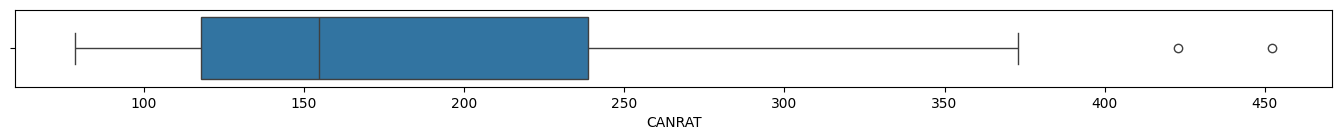

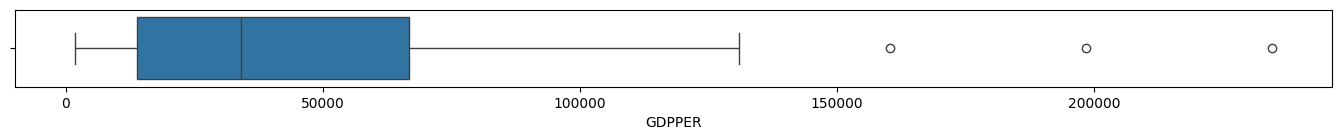

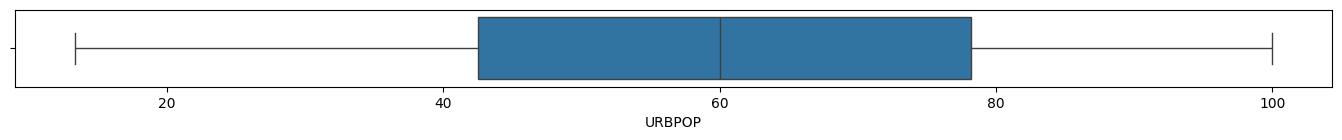

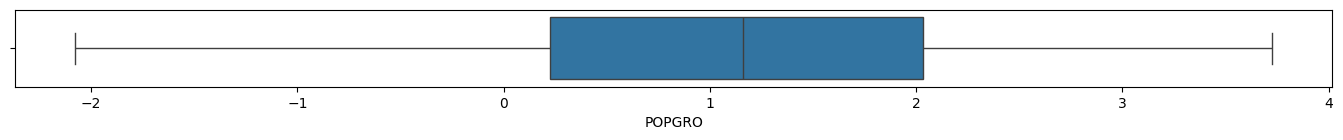

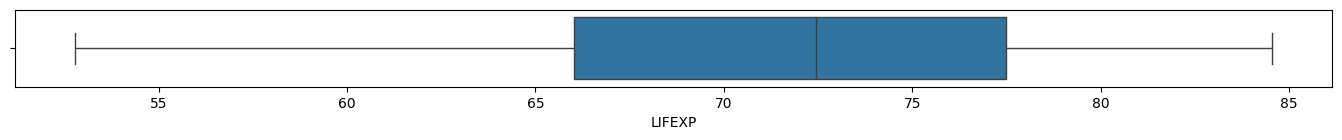

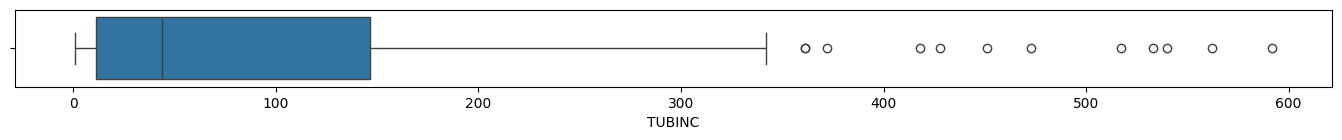

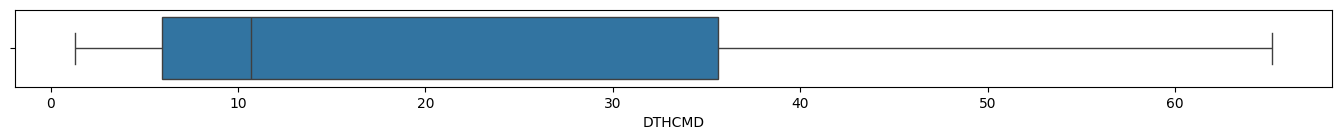

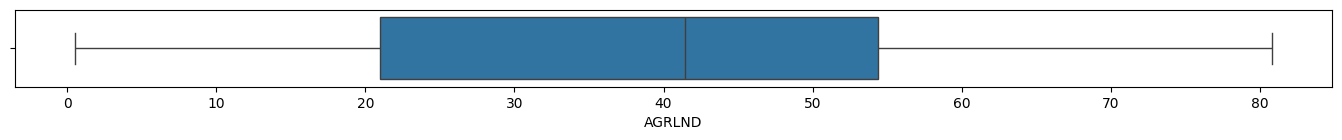

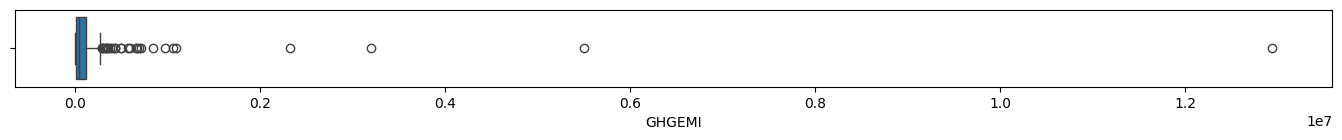

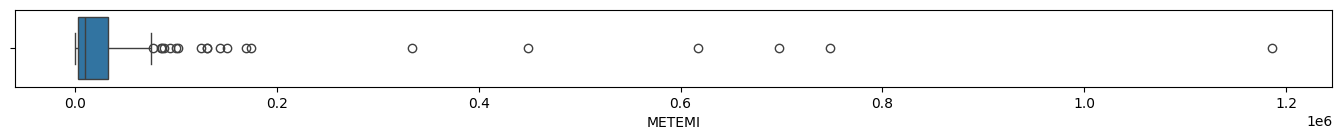

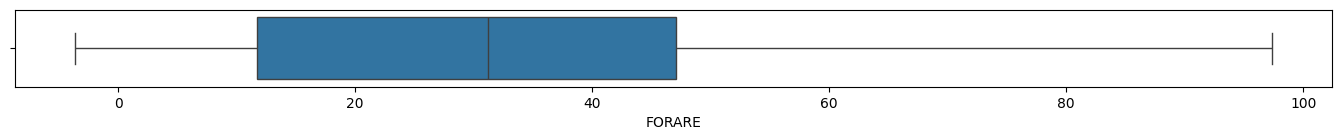

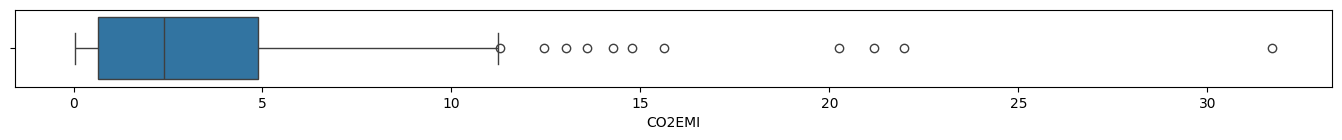

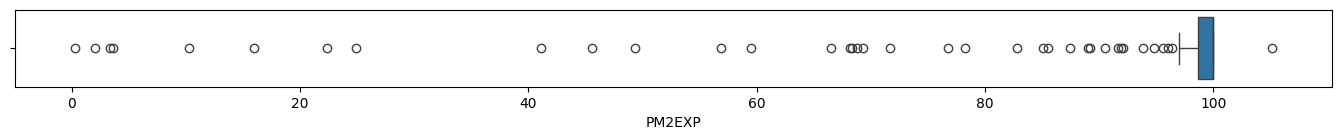

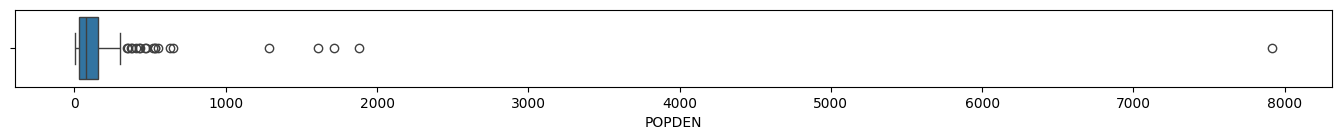

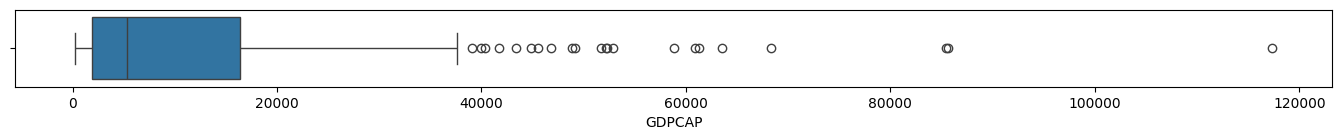

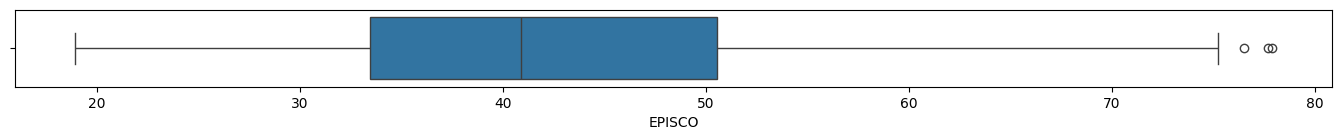

In [113]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in cancer_rate_imputed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_imputed_numeric, x=column)

### 1.4.4 Collinearity <a class="anchor" id="1.4.4"></a>

1. Majority of the numeric variables reported moderate to high correlation which were statistically significant.
2. Among pairwise combinations of numeric variables, high Pearson.Correlation.Coefficient values were noted for:
    * <span style="color: #FF0000">GDPPER</span> and <span style="color: #FF0000">GDPCAP</span>: Pearson.Correlation.Coefficient = +0.921
    * <span style="color: #FF0000">GHGEMI</span> and <span style="color: #FF0000">METEMI</span>: Pearson.Correlation.Coefficient = +0.905
3. Among the highly correlated pairs, variables with the lowest correlation against the target variable were removed.
    * <span style="color: #FF0000">GDPPER</span>: Pearson.Correlation.Coefficient = +0.690
    * <span style="color: #FF0000">METEMI</span>: Pearson.Correlation.Coefficient = +0.062
4. The cleaned dataset is comprised of:
    * **163 rows** (observations)
    * **16 columns** (variables)
        * **1/16 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/16 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **13/16 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/16 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [114]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
def plot_correlation_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, 
                ax=ax,
                mask=mask,
                annot=True, 
                vmin=-1, 
                vmax=1, 
                center=0,
                cmap='coolwarm', 
                linewidths=1, 
                linecolor='gray', 
                cbar_kws={'orientation': 'horizontal'})  

In [115]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# among pairs of numeric columns
##################################
cancer_rate_imputed_numeric_correlation_pairs = {}
cancer_rate_imputed_numeric_columns = cancer_rate_imputed_numeric.columns.tolist()
for numeric_column_a, numeric_column_b in itertools.combinations(cancer_rate_imputed_numeric_columns, 2):
    cancer_rate_imputed_numeric_correlation_pairs[numeric_column_a + '_' + numeric_column_b] = stats.pearsonr(
        cancer_rate_imputed_numeric.loc[:, numeric_column_a], 
        cancer_rate_imputed_numeric.loc[:, numeric_column_b])

In [116]:
##################################
# Formulating the pairwise correlation summary
# for all numeric columns
##################################
cancer_rate_imputed_numeric_summary = cancer_rate_imputed_numeric.from_dict(cancer_rate_imputed_numeric_correlation_pairs, orient='index')
cancer_rate_imputed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_rate_imputed_numeric_summary.sort_values(by=['Pearson.Correlation.Coefficient'], ascending=False).head(20))

,Pearson.Correlation.Coefficient,Correlation.PValue
GDPPER_GDPCAP,0.9210,0.0000
GHGEMI_METEMI,0.9051,0.0000
POPGRO_DTHCMD,0.7595,0.0000
GDPPER_LIFEXP,0.7558,0.0000
CANRAT_EPISCO,0.7126,0.0000
CANRAT_GDPCAP,0.6970,0.0000
GDPCAP_EPISCO,0.6967,0.0000
CANRAT_LIFEXP,0.6923,0.0000
CANRAT_GDPPER,0.6868,0.0000
LIFEXP_GDPCAP,0.6838,0.0000


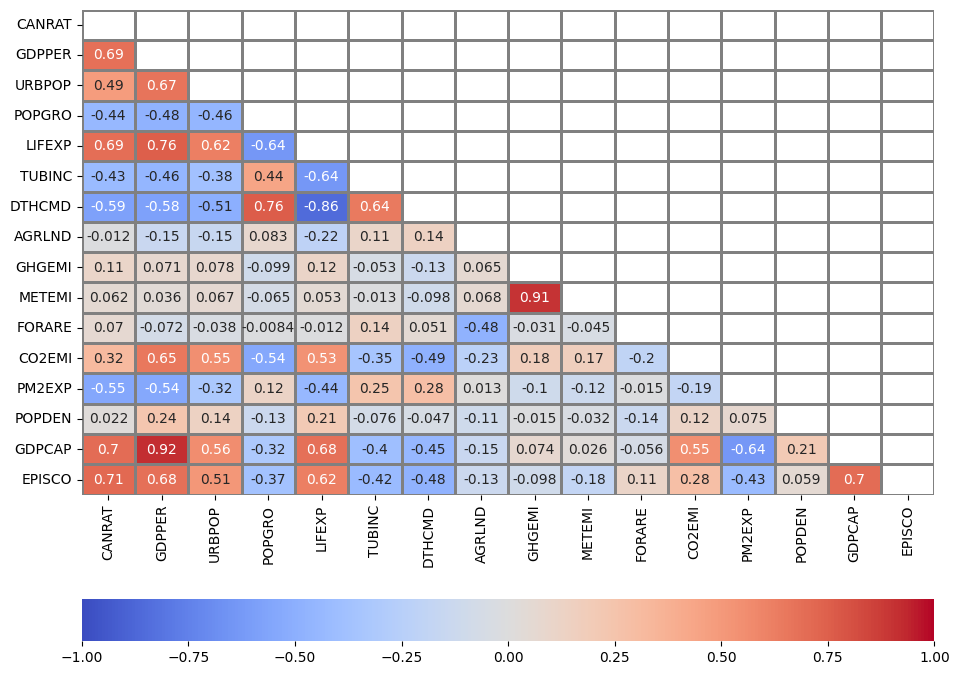

In [117]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
cancer_rate_imputed_numeric_correlation = cancer_rate_imputed_numeric.corr()
mask = np.triu(cancer_rate_imputed_numeric_correlation)
plot_correlation_matrix(cancer_rate_imputed_numeric_correlation,mask)
plt.show()

In [118]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
def correlation_significance(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

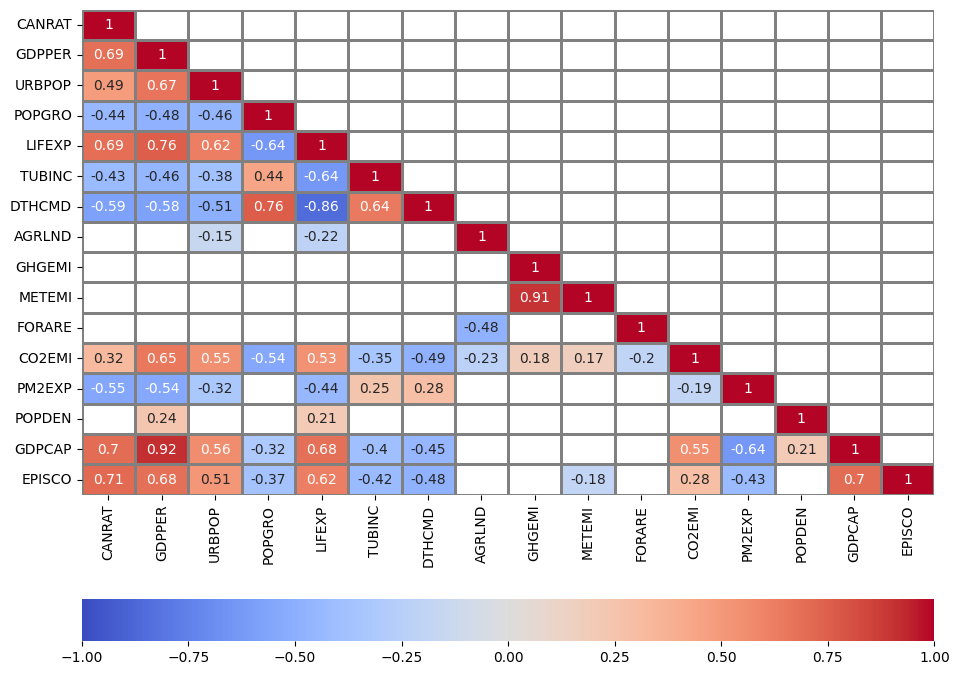

In [119]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
cancer_rate_imputed_numeric_correlation_p_values = correlation_significance(cancer_rate_imputed_numeric)                     
mask = np.invert(np.tril(cancer_rate_imputed_numeric_correlation_p_values<0.05)) 
plot_correlation_matrix(cancer_rate_imputed_numeric_correlation,mask)  

In [120]:
##################################
# Filtering out one among the 
# highly correlated variable pairs with
# lesser Pearson.Correlation.Coefficient
# when compared to the target variable
##################################
cancer_rate_imputed_numeric.drop(['GDPPER','METEMI'], inplace=True, axis=1)

In [121]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_imputed_numeric.shape)

Dataset Dimensions: 


(163, 14)

### 1.4.5 Shape Transformation <a class="anchor" id="1.4.5"></a>

1. A Yeo-Johnson transformation was applied to all numeric variables to improve distributional shape.
2. Most variables achieved symmetrical distributions with minimal outliers after transformation.
3. One variable which remained skewed even after applying shape transformation was removed.
    * <span style="color: #FF0000">PM2EXP</span> 
4. The transformed dataset is comprised of:
    * **163 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/15 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/15 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/15 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [122]:
##################################
# Conducting a Yeo-Johnson Transformation
# to address the distributional
# shape of the variables
##################################
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',
                                          standardize=False)
cancer_rate_imputed_numeric_array = yeo_johnson_transformer.fit_transform(cancer_rate_imputed_numeric)

In [123]:
##################################
# Formulating a new dataset object
# for the transformed data
##################################
cancer_rate_transformed_numeric = pd.DataFrame(cancer_rate_imputed_numeric_array,
                                               columns=cancer_rate_imputed_numeric.columns)

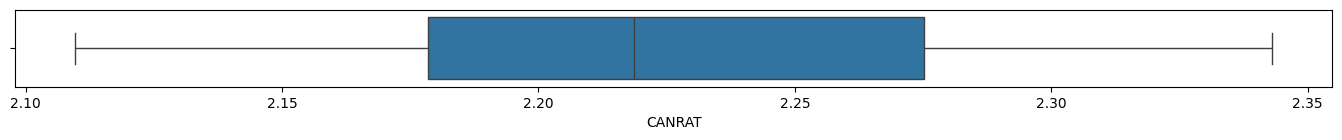

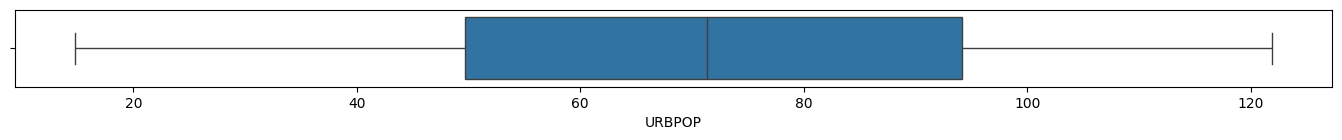

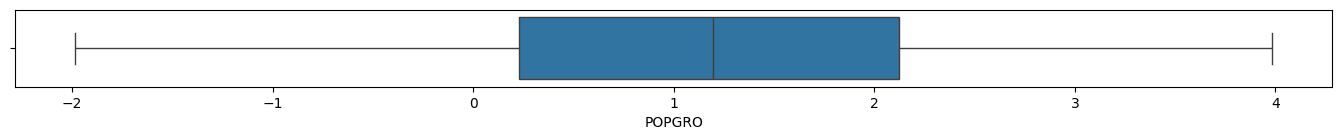

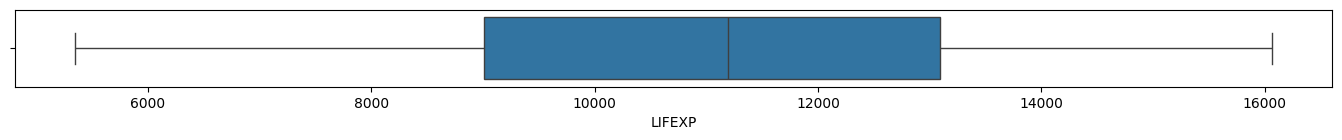

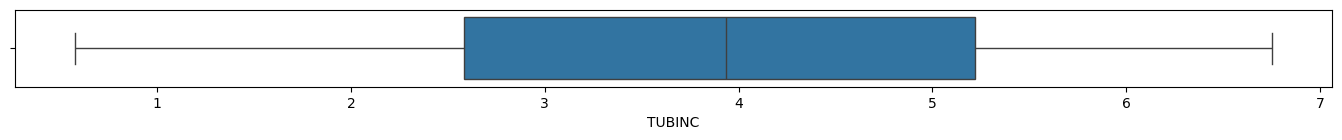

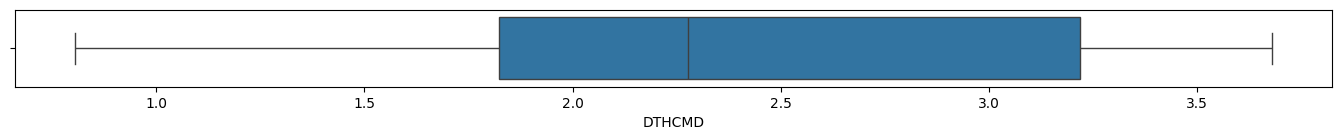

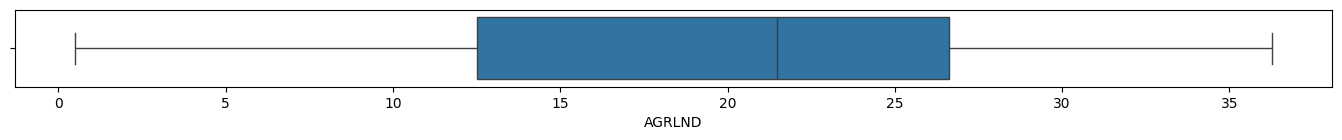

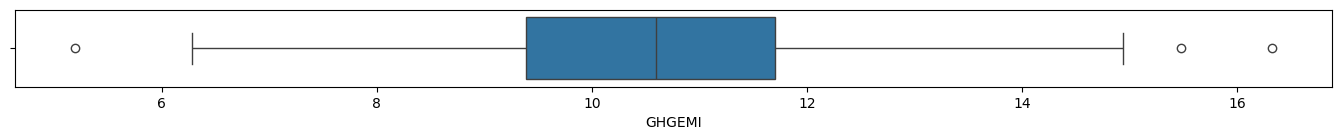

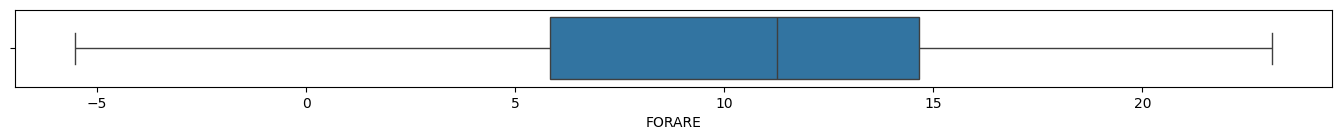

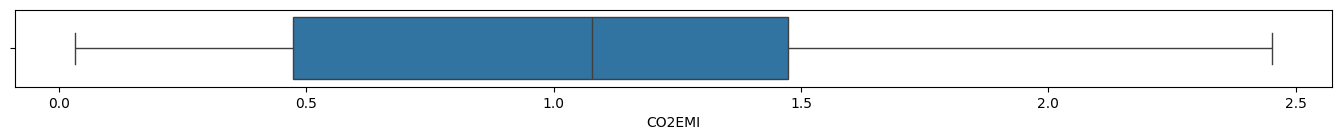

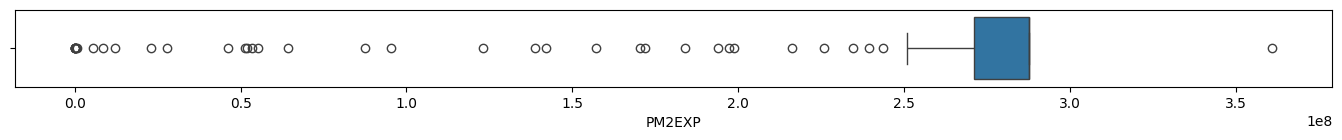

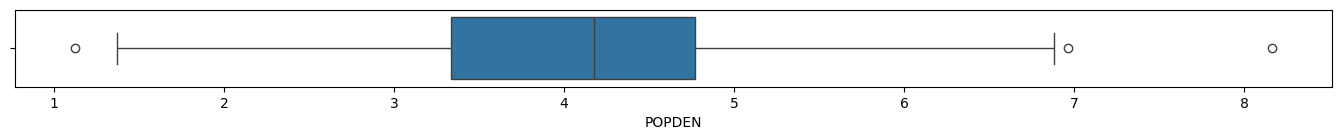

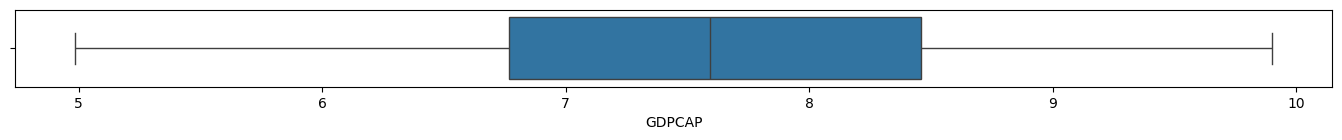

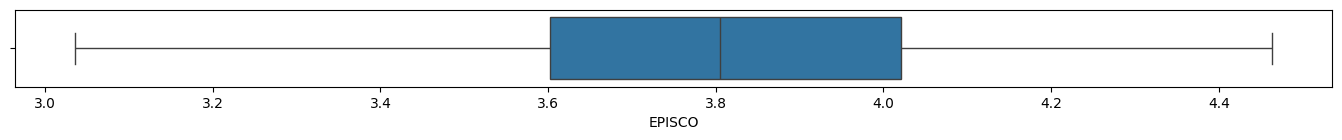

In [124]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cancer_rate_transformed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_transformed_numeric, x=column)

In [125]:
##################################
# Filtering out the column
# which remained skewed even
# after applying shape transformation
##################################
cancer_rate_transformed_numeric.drop(['PM2EXP'], inplace=True, axis=1)

In [126]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_transformed_numeric.shape)

Dataset Dimensions: 


(163, 13)

### 1.4.6 Centering and Scaling <a class="anchor" id="1.4.6"></a>

1. All numeric variables were transformed using the standardization method to achieve a comparable scale between values.
4. The scaled dataset is comprised of:
    * **163 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/15 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/15 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/15 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [127]:
##################################
# Conducting standardization
# to transform the values of the 
# variables into comparable scale
##################################
standardization_scaler = StandardScaler()
cancer_rate_transformed_numeric_array = standardization_scaler.fit_transform(cancer_rate_transformed_numeric)

In [128]:
##################################
# Formulating a new dataset object
# for the scaled data
##################################
cancer_rate_scaled_numeric = pd.DataFrame(cancer_rate_transformed_numeric_array,
                                          columns=cancer_rate_transformed_numeric.columns)

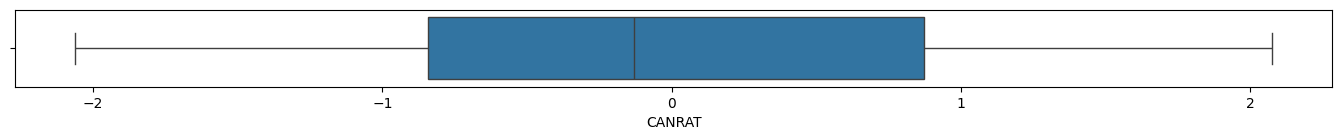

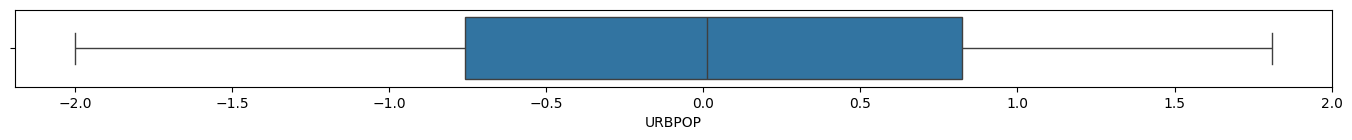

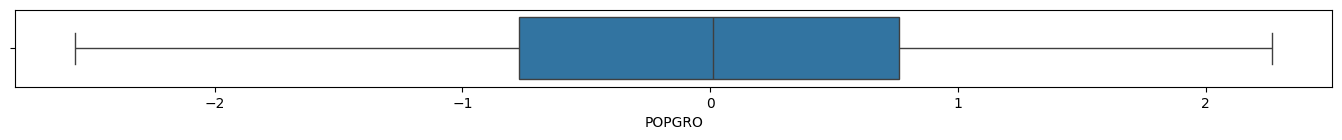

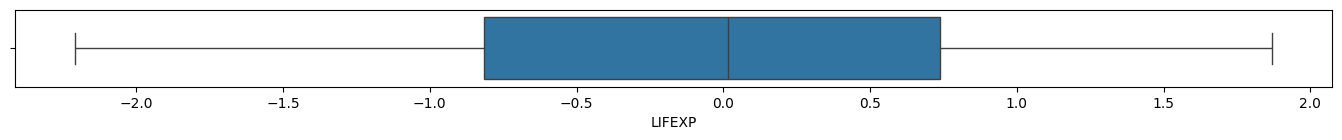

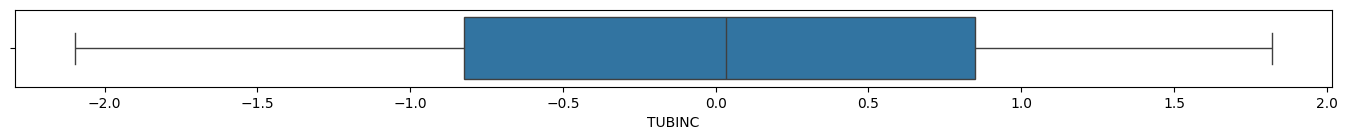

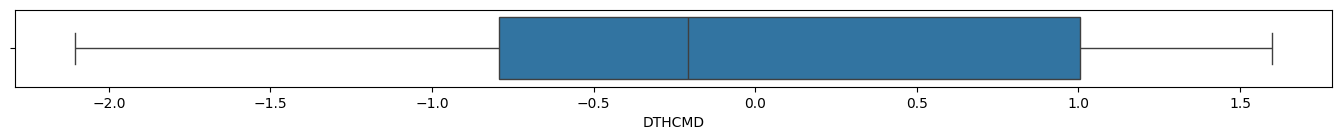

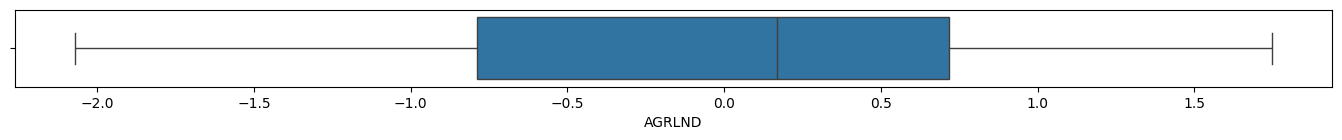

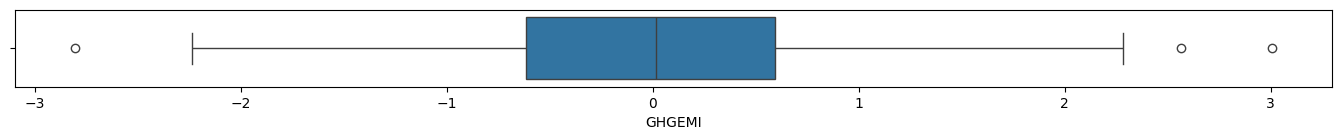

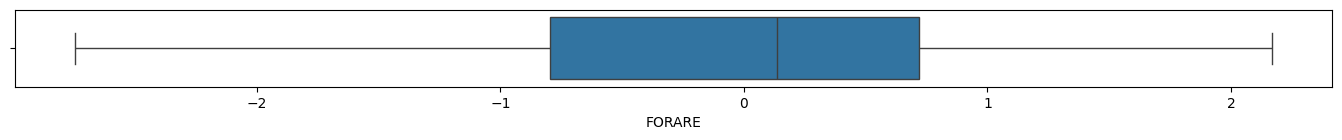

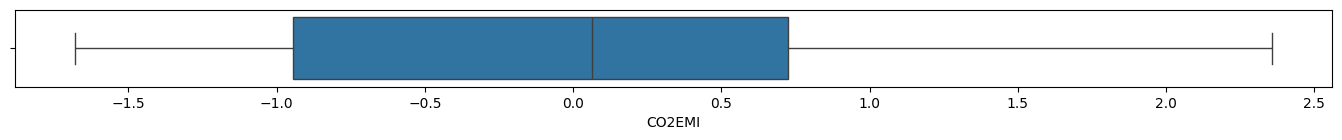

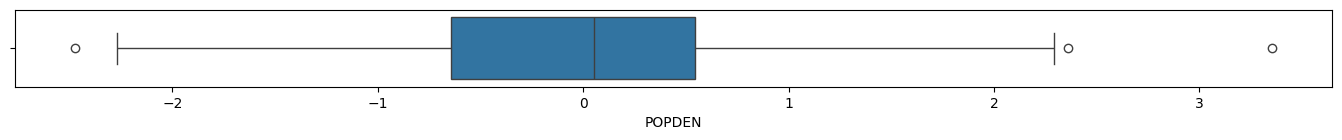

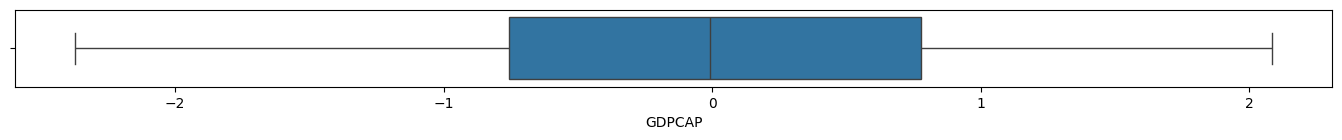

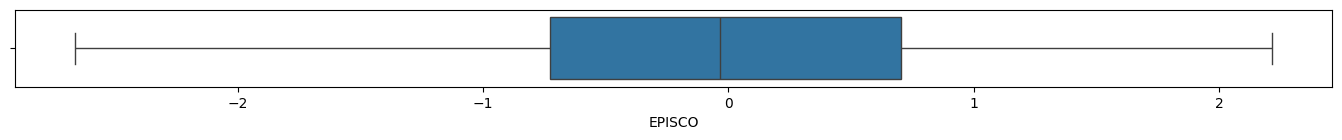

In [129]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cancer_rate_scaled_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_scaled_numeric, x=column)

### 1.4.7 Data Encoding <a class="anchor" id="1.4.7"></a>

1. One-hot encoding was applied to the <span style="color: #FF0000">HDICAP_VH</span> variable resulting to 4 additional columns in the dataset:
    * <span style="color: #FF0000">HDICAP_L</span>
    * <span style="color: #FF0000">HDICAP_M</span>
    * <span style="color: #FF0000">HDICAP_H</span>
    * <span style="color: #FF0000">HDICAP_VH</span>

In [130]:
##################################
# Formulating the categorical column
# for encoding transformation
##################################
cancer_rate_categorical_encoded = pd.DataFrame(cancer_rate_cleaned_categorical.loc[:, 'HDICAT'].to_list(),
                                               columns=['HDICAT'])

In [131]:
##################################
# Applying a one-hot encoding transformation
# for the categorical column
##################################
cancer_rate_categorical_encoded = pd.get_dummies(cancer_rate_categorical_encoded, columns=['HDICAT'])

### 1.4.8 Preprocessed Data Description <a class="anchor" id="1.4.8"></a>

1. The preprocessed dataset is comprised of:
    * **163 rows** (observations)
    * **18 columns** (variables)
        * **1/18 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/18 target** (numeric)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/18 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **4/18 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT_L</span>
             * <span style="color: #FF0000">HDICAT_M</span>
             * <span style="color: #FF0000">HDICAT_H</span>
             * <span style="color: #FF0000">HDICAT_VH</span>

In [132]:
##################################
# Consolidating both numeric columns
# and encoded categorical columns
##################################
cancer_rate_preprocessed = pd.concat([cancer_rate_scaled_numeric,cancer_rate_categorical_encoded], axis=1, join='inner')  

In [133]:
##################################
# Performing a general exploration of the consolidated dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_preprocessed.shape)

Dataset Dimensions: 


(163, 17)

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. Bivariate analysis identified individual predictors with generally linear relationship to the target variable based on visual inspection.
2. Increasing values for the following predictors correspond to higher <span style="color: #FF0000">CANRAT</span> measurements: 
    * <span style="color: #FF0000">URBPOP</span>
    * <span style="color: #FF0000">LIFEXP</span>    
    * <span style="color: #FF0000">CO2EMI</span>    
    * <span style="color: #FF0000">GDPCAP</span>    
    * <span style="color: #FF0000">EPISCO</span>    
    * <span style="color: #FF0000">HDICAP_VH</span>
3. Decreasing values for the following predictors correspond to higher <span style="color: #FF0000">CANRAT</span> measurements: 
    * <span style="color: #FF0000">POPGRO</span>
    * <span style="color: #FF0000">TUBINC</span>    
    * <span style="color: #FF0000">DTHCMD</span> 
    * <span style="color: #FF0000">HDICAP_L</span>
    * <span style="color: #FF0000">HDICAP_M</span>
4. Values for the following predictors did not affect <span style="color: #FF0000">CANRAT</span> measurements: 
    * <span style="color: #FF0000">AGRLND</span>
    * <span style="color: #FF0000">GHGEMI</span>    
    * <span style="color: #FF0000">FORARE</span> 
    * <span style="color: #FF0000">POPDEN</span> 
    * <span style="color: #FF0000">HDICAP_H</span>

In [134]:
##################################
# Segregating the target
# and predictor variable lists
##################################
cancer_rate_preprocessed_target = ['CANRAT']
cancer_rate_preprocessed_predictors = cancer_rate_preprocessed.drop('CANRAT', axis=1).columns

In [135]:
##################################
# Segregating the target
# and predictor variable names
##################################
y_variable = 'CANRAT'
x_variables = cancer_rate_preprocessed_predictors

In [136]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 8
num_cols = 2

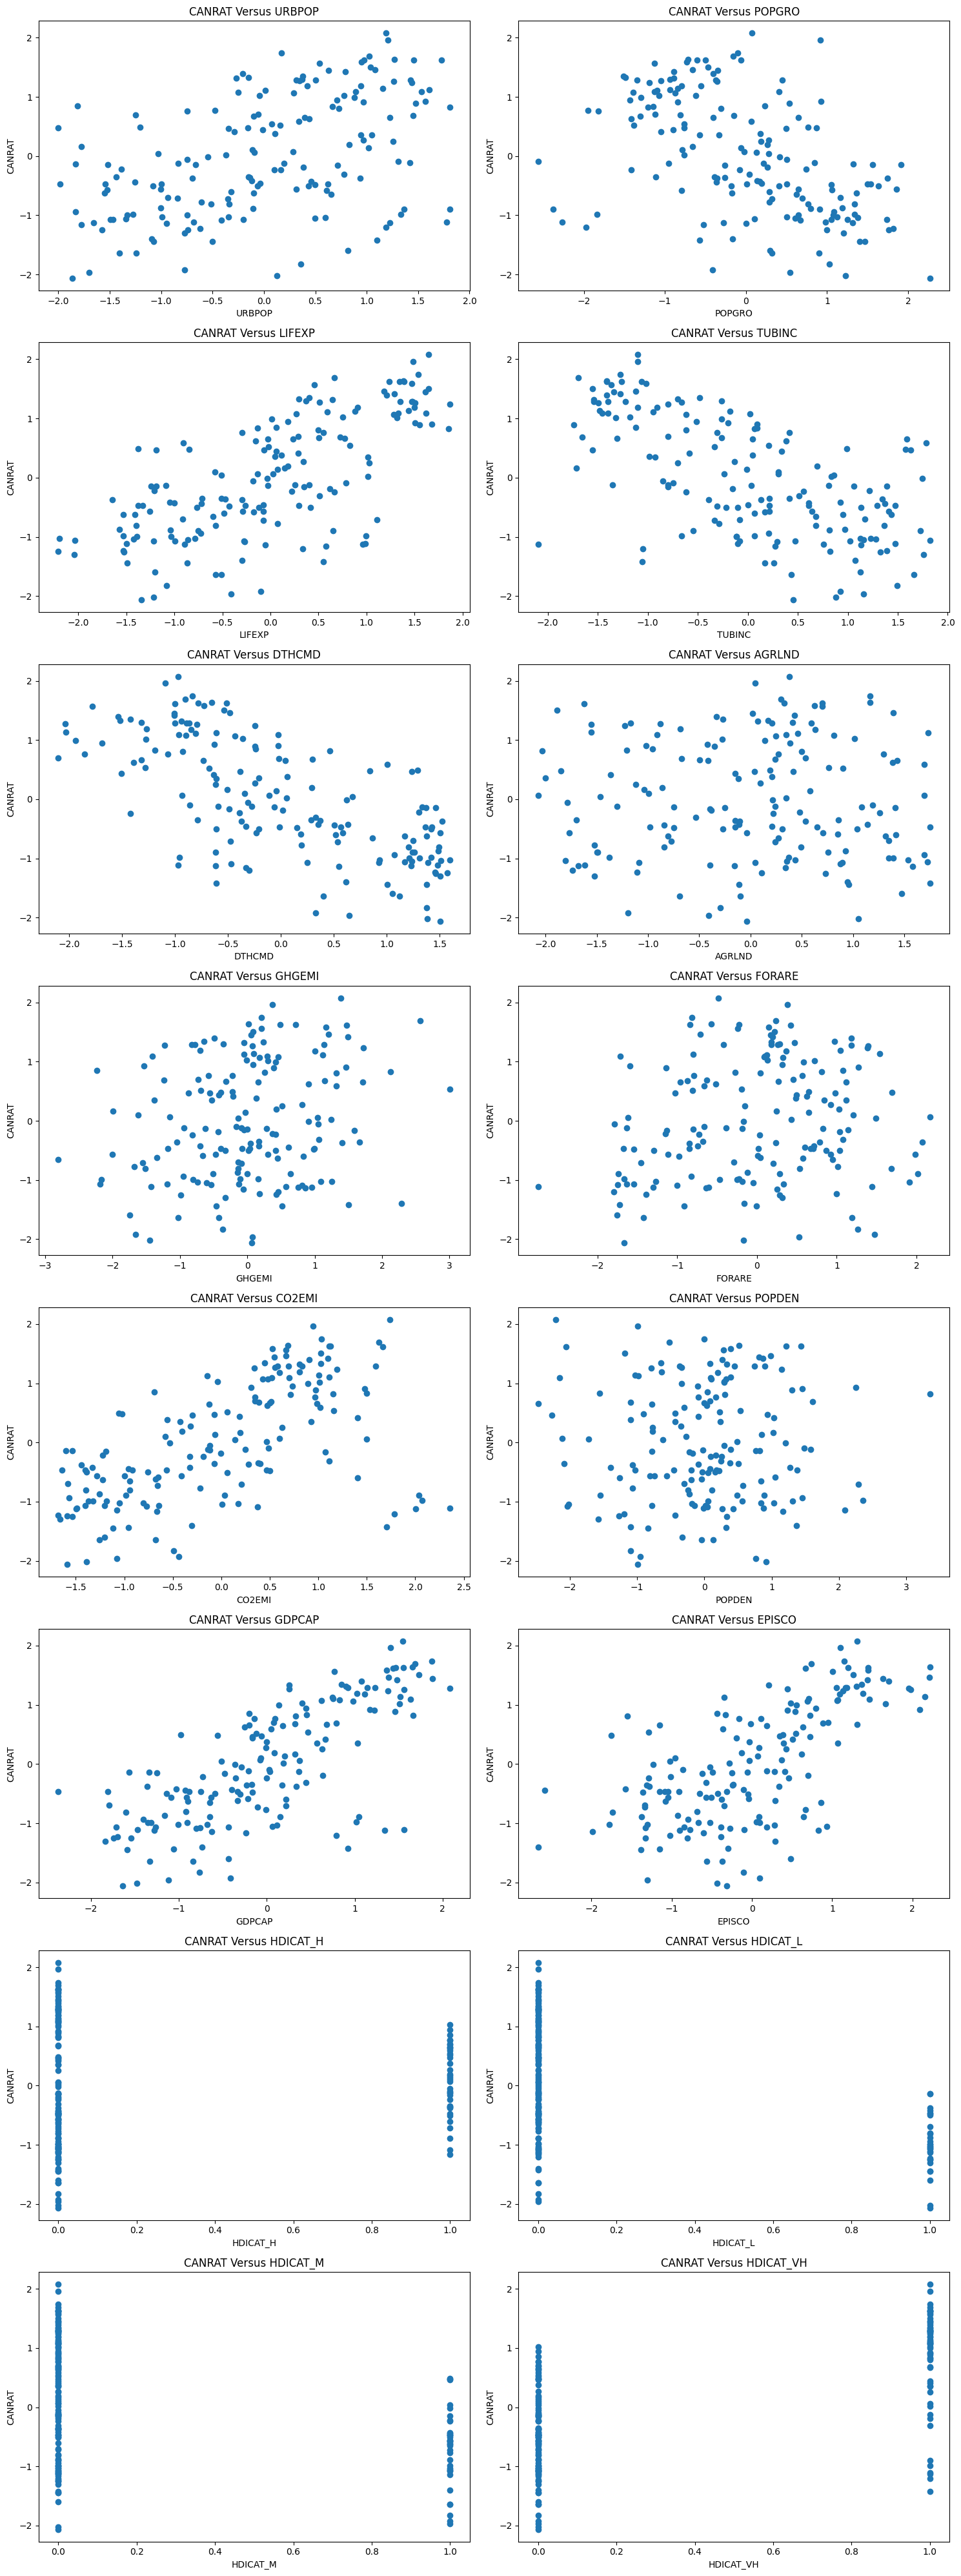

In [137]:
##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual scatterplots
# for all scaled numeric columns
##################################
for i, x_variable in enumerate(x_variables):
    ax = axes[i]
    ax.scatter(cancer_rate_preprocessed[x_variable],cancer_rate_preprocessed[y_variable])
    ax.set_title(f'{y_variable} Versus {x_variable}')
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictors to the <span style="color: #FF0000">CANRAT</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Pearson correlation coefficient is equal to zero 
    * **Alternative**: Pearson correlation coefficient is not equal to zero    
2. There is sufficient evidence to conclude of a statistically significant linear relationship between the <span style="color: #FF0000">CANRAT</span> target variable and 10 of the 12 numeric predictors given their high Pearson correlation coefficient values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">GDPCAP</span>: Pearson.Correlation.Coefficient=+0.735, Correlation.PValue=0.000
    * <span style="color: #FF0000">LIFEXP</span>: Pearson.Correlation.Coefficient=+0.702, Correlation.PValue=0.000   
    * <span style="color: #FF0000">DTHCMD</span>: Pearson.Correlation.Coefficient=-0.687, Correlation.PValue=0.000 
    * <span style="color: #FF0000">EPISCO</span>: Pearson.Correlation.Coefficient=+0.648, Correlation.PValue=0.000 
    * <span style="color: #FF0000">TUBINC</span>: Pearson.Correlation.Coefficient=+0.628, Correlation.PValue=0.000 
    * <span style="color: #FF0000">CO2EMI</span>: Pearson.Correlation.Coefficient=+0.585, Correlation.PValue=0.000  
    * <span style="color: #FF0000">POPGRO</span>: Pearson.Correlation.Coefficient=-0.498, Correlation.PValue=0.000
    * <span style="color: #FF0000">URBPOP</span>: Pearson.Correlation.Coefficient=+0.479, Correlation.PValue=0.000   
    * <span style="color: #FF0000">GHGEMI</span>: Pearson.Correlation.Coefficient=+0.232, Correlation.PValue=0.002
    * <span style="color: #FF0000">FORARE</span>: Pearson.Correlation.Coefficient=+0.165, Correlation.PValue=0.035
3. The relationship between the categorical predictors to the <span style="color: #FF0000">CANRAT</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups 0 and 1 is equal to zero 
    * **Alternative**: Difference in the means between groups 0 and 1 is not equal to zero    
2. There is sufficient evidence to conclude of a statistically significant difference between the means of <span style="color: #FF0000">CANRAT</span> measuremens obtained from groups 0 and 1 in 3 of the 4 categorical predictors given their high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">HDICAT_VH</span>: T.Test.Statistic=-10.605, T.Test.PValue=0.000
    * <span style="color: #FF0000">HDICAT_L</span>: T.Test.Statistic=+6.559, T.Test.PValue=0.000   
    * <span style="color: #FF0000">HDICAT_M</span>: T.Test.Statistic=+5.104, T.Test.PValue=0.000 

In [138]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# between the target variable
# and numeric predictor columns
##################################
cancer_rate_preprocessed_numeric_correlation_target = {}
cancer_rate_preprocessed_numeric = cancer_rate_preprocessed.drop(['HDICAT_L','HDICAT_M','HDICAT_H','HDICAT_VH'], axis=1)
cancer_rate_preprocessed_numeric_columns = cancer_rate_preprocessed_numeric.columns.tolist()
for numeric_column in cancer_rate_preprocessed_numeric_columns:
    cancer_rate_preprocessed_numeric_correlation_target['CANRAT_' + numeric_column] = stats.pearsonr(
        cancer_rate_preprocessed_numeric.loc[:, 'CANRAT'], 
        cancer_rate_preprocessed_numeric.loc[:, numeric_column])

In [139]:
##################################
# Formulating the pairwise correlation summary
# between the target variable
# and numeric predictor columns
##################################
cancer_rate_preprocessed_numeric_summary = cancer_rate_preprocessed_numeric.from_dict(cancer_rate_preprocessed_numeric_correlation_target, orient='index')
cancer_rate_preprocessed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_rate_preprocessed_numeric_summary.sort_values(by=['Correlation.PValue'], ascending=True).head(13))

,Pearson.Correlation.Coefficient,Correlation.PValue
CANRAT_CANRAT,1.0000,0.0000
CANRAT_GDPCAP,0.7351,0.0000
CANRAT_LIFEXP,0.7024,0.0000
CANRAT_DTHCMD,-0.6871,0.0000
CANRAT_EPISCO,0.6484,0.0000
CANRAT_TUBINC,-0.6289,0.0000
CANRAT_CO2EMI,0.5855,0.0000
CANRAT_POPGRO,-0.4985,0.0000
CANRAT_URBPOP,0.4794,0.0000
CANRAT_GHGEMI,0.2325,0.0028


In [140]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and categorical predictor columns
##################################
cancer_rate_preprocessed_categorical_ttest_target = {}
cancer_rate_preprocessed_categorical = cancer_rate_preprocessed[['CANRAT','HDICAT_L','HDICAT_M','HDICAT_H','HDICAT_VH']]
cancer_rate_preprocessed_categorical_columns = ['HDICAT_L','HDICAT_M','HDICAT_H','HDICAT_VH']
for categorical_column in cancer_rate_preprocessed_categorical_columns:
    group_0 = cancer_rate_preprocessed_categorical[cancer_rate_preprocessed_categorical.loc[:,categorical_column]==0]
    group_1 = cancer_rate_preprocessed_categorical[cancer_rate_preprocessed_categorical.loc[:,categorical_column]==1]
    cancer_rate_preprocessed_categorical_ttest_target['CANRAT_' + categorical_column] = stats.ttest_ind(
        group_0['CANRAT'], 
        group_1['CANRAT'], 
        equal_var=True)

In [141]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and categorical predictor columns
##################################
cancer_rate_preprocessed_categorical_summary = cancer_rate_preprocessed_categorical.from_dict(cancer_rate_preprocessed_categorical_ttest_target, orient='index')
cancer_rate_preprocessed_categorical_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(cancer_rate_preprocessed_categorical_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(4))

,T.Test.Statistic,T.Test.PValue
CANRAT_HDICAT_VH,-10.6057,0.0000
CANRAT_HDICAT_L,6.5598,0.0000
CANRAT_HDICAT_M,5.1050,0.0000
CANRAT_HDICAT_H,-0.6360,0.5257


## 1.6. Model Development <a class="anchor" id="1.6"></a>

### 1.6.1 Premodelling Data Description <a class="anchor" id="1.6.1"></a>

1. Among the 10 numeric variables determined to have a statistically significant linear relationship between the <span style="color: #FF0000">CANRAT</span> target variable, only 6 were retained with absolute Pearson correlation coefficient values greater than 0.50. 
    * <span style="color: #FF0000">GDPCAP</span>: Pearson.Correlation.Coefficient=+0.735, Correlation.PValue=0.000
    * <span style="color: #FF0000">LIFEXP</span>: Pearson.Correlation.Coefficient=+0.702, Correlation.PValue=0.000   
    * <span style="color: #FF0000">DTHCMD</span>: Pearson.Correlation.Coefficient=-0.687, Correlation.PValue=0.000 
    * <span style="color: #FF0000">EPISCO</span>: Pearson.Correlation.Coefficient=+0.648, Correlation.PValue=0.000 
    * <span style="color: #FF0000">TUBINC</span>: Pearson.Correlation.Coefficient=+0.628, Correlation.PValue=0.000 
    * <span style="color: #FF0000">CO2EMI</span>: Pearson.Correlation.Coefficient=+0.585, Correlation.PValue=0.000  
2. Among the 4 categorical predictors determined to have a a statistically significant difference between the means of <span style="color: #FF0000">CANRAT</span> measurements obtained from groups 0 and 1, only 1 was retained with absolute T-Test statistics greater than 10.
    * <span style="color: #FF0000">HDICAT_VH</span>: T.Test.Statistic=-10.605, T.Test.PValue=0.000

In [142]:
##################################
# Consolidating relevant numeric columns
# and encoded categorical columns
# after hypothesis testing
##################################
cancer_rate_premodelling = cancer_rate_preprocessed.drop(['AGRLND','POPDEN','GHGEMI','FORARE','POPGRO','URBPOP','HDICAT_H','HDICAT_M','HDICAT_L'], axis=1)

In [143]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_premodelling.shape)

Dataset Dimensions: 


(163, 8)

In [144]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate_premodelling.dtypes)

Column Names and Data Types:


CANRAT       float64
LIFEXP       float64
TUBINC       float64
DTHCMD       float64
CO2EMI       float64
GDPCAP       float64
EPISCO       float64
HDICAT_VH       bool
dtype: object

In [145]:
##################################
# Taking a snapshot of the dataset
##################################
cancer_rate_premodelling.head()

,CANRAT,LIFEXP,TUBINC,DTHCMD,CO2EMI,GDPCAP,EPISCO,HDICAT_VH
0,2.0765,1.6432,-1.1023,-0.9715,1.7368,1.5498,1.3067,True
1,1.9630,1.4880,-1.1023,-1.0914,0.9435,1.4078,1.1029,True
2,1.7428,1.5370,-1.2753,-0.8363,1.0317,1.8794,1.1458,True
3,1.6909,0.6642,-1.6963,-0.9037,1.6277,1.6854,0.7398,True
4,1.6342,1.3819,-1.4134,-0.6571,0.6863,1.6578,2.2183,True


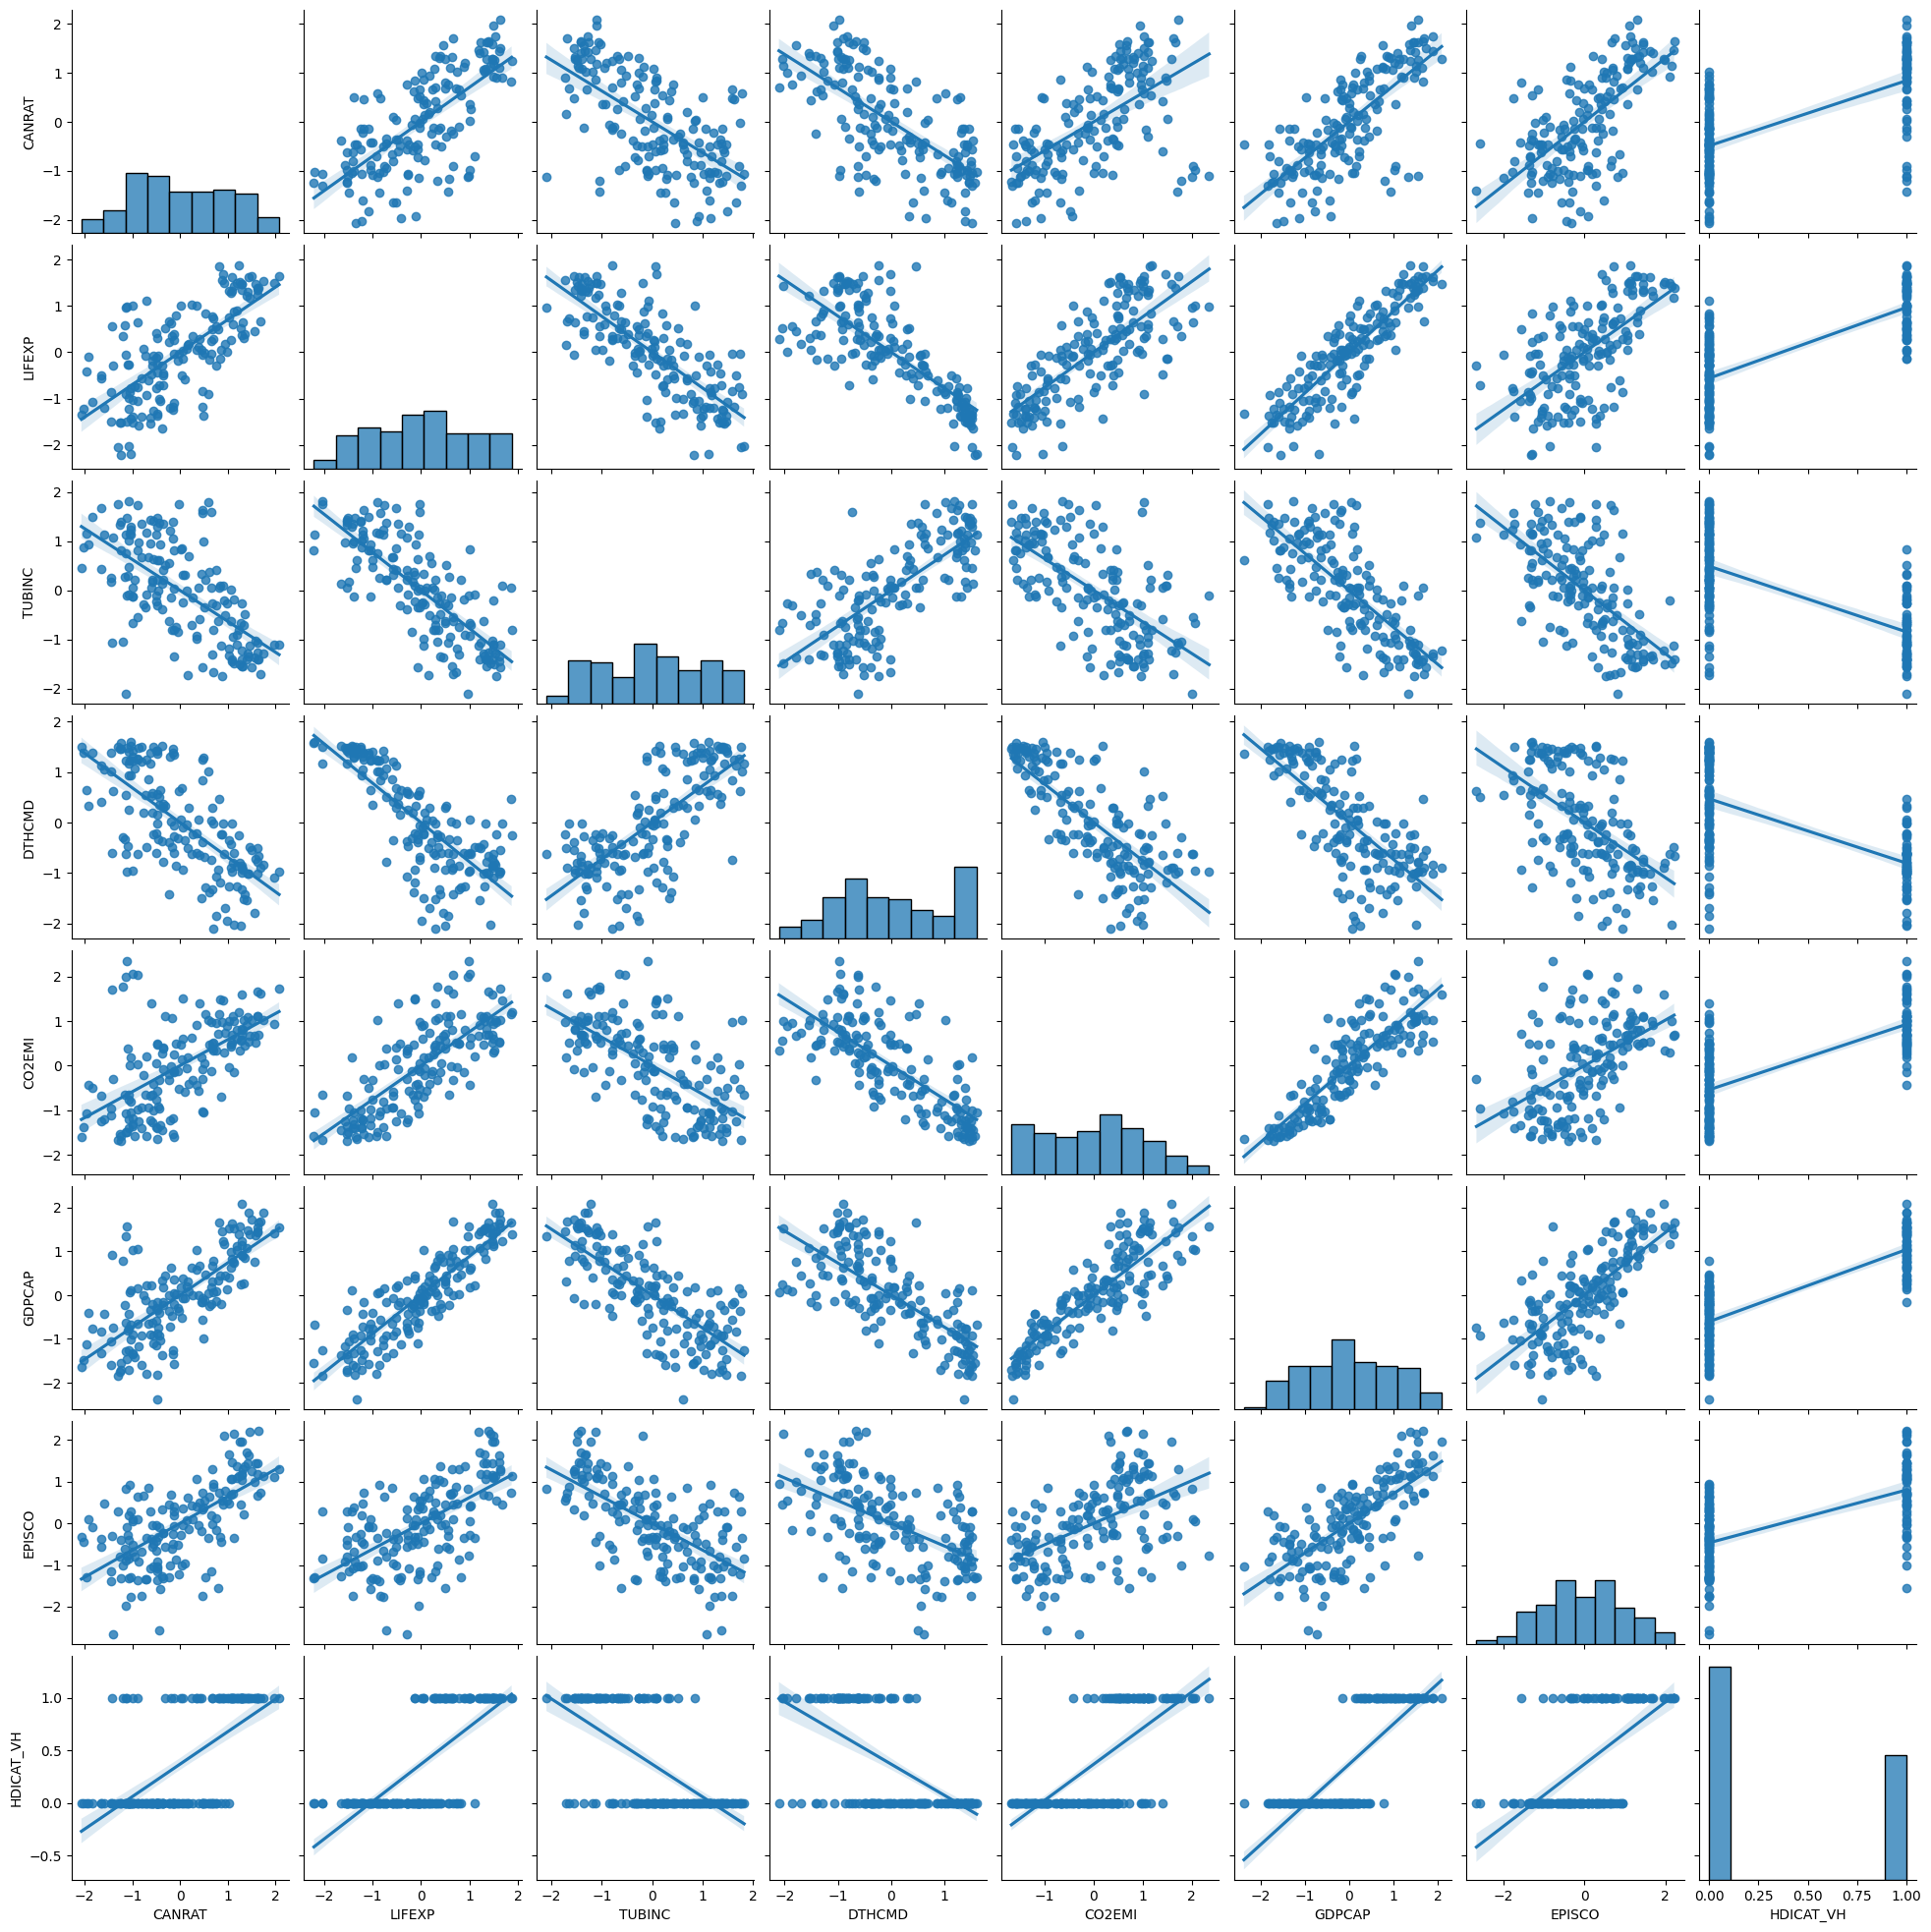

In [146]:
##################################
# Gathering the pairplot for all variables
##################################
sns.pairplot(cancer_rate_premodelling, kind='reg')
plt.show()

In [147]:
##################################
# Separating the target 
# and predictor columns
##################################
X = cancer_rate_premodelling.drop('CANRAT', axis = 1)
y = cancer_rate_premodelling.CANRAT

In [148]:
##################################
# Formulating the train and test data
# using a 70-30 ratio
##################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 88888888)

In [149]:
##################################
# Performing a general exploration of the train dataset
##################################
print('Dataset Dimensions: ')
display(X_train.shape)

Dataset Dimensions: 


(114, 7)

In [150]:
##################################
# Performing a general exploration of the train dataset
##################################
print('Dataset Dimensions: ')
display(X_test.shape)

Dataset Dimensions: 


(49, 7)

In [151]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['R2','MSE','MAE']
    metric_value = [r2_score(y_true, y_pred),
                   mean_squared_error(y_true, y_pred),
                   mean_absolute_error(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

In [152]:
##################################
# Defining a function to investigate
# model performance with respect to
# the regularization parameter
##################################
def rmse_alpha_plot(model_type):
    MSE=[]
    coefs = []
    for alpha in alphas:
        model = model_type(alpha=alpha)
        model.fit(X_train, y_train)
        coefs.append(abs(model.coef_))
        y_pred = model.predict(X_test)
        MSE.append(mean_squared_error(y_test, y_pred))

    ax = plt.gca()
    ax.plot(alphas, MSE)
    ax.set_xscale("log")
    plt.xlabel("Alpha")
    plt.ylabel("Mean Squared Error")
    plt.title("Mean Squared Error versus Alpha Regularization")
    plt.show()
    
    
def rmse_l1_ratio_plot(model_type):
    MSE=[]
    coefs = []
    for l1_ratio in l1_ratios:
        model = model_type(l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        coefs.append(abs(model.coef_))
        y_pred = model.predict(X_test)
        MSE.append(mean_squared_error(y_test, y_pred))

    ax = plt.gca()
    ax.plot(l1_ratios, MSE)
    plt.xlabel("L1_Ratio")
    plt.ylabel("Mean Squared Error")
    plt.title("Mean Squared Error versus L1_Ratio Regularization")
    plt.show()

### 1.6.2 Linear Regression <a class="anchor" id="1.6.2"></a>

[Linear Regression](https://link.springer.com/book/10.1007/978-1-4757-3462-1) explores the linear relationship between a scalar response and one or more covariates by having the conditional mean of the dependent variable be an affine function of the independent variables. The relationship is modeled through a disturbance term which represents an unobserved random variable that adds noise. The algorithm is typically formulated from the data using the least squares method which seeks to estimate the coefficients by minimizing the squared residual function. The linear equation assigns one scale factor represented by a coefficient to each covariate and an additional coefficient called the intercept or the bias coefficient which gives the line an additional degree of freedom allowing to move up and down a two-dimensional plot.

1. The [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented. 
2. The model contains 1 hyperparameter:
    * <span style="color: #FF0000">degree</span> = degree held constant at a value of 1
3. No hyperparameter tuning was conducted. 
4. The apparent model performance of the optimal model is summarized as follows:
    * **R-Squared** = 0.6332
    * **Mean Squared Error** = 0.3550
    * **Mean Absolute Error** = 0.4609
5. The independent test model performance of the final model is summarized as follows:
    * **R-Squared** = 0.6446
    * **Mean Squared Error** = 0.3716
    * **Mean Absolute Error** = 0.4773
6. Apparent and independent test model performance are relatively comparable, indicative of the absence of model overfitting.

In [153]:
##################################
# Defining a pipeline for the 
# linear regression model
##################################
linear_regression_pipeline = Pipeline([('polynomial_features', PolynomialFeatures(include_bias=False, degree=1)), 
                                       ('linear_regression', LinearRegression())])

##################################
# Fitting a linear regression model
##################################
linear_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])

In [154]:
##################################
# Evaluating the linear regression model
# on the train set
##################################
linear_y_hat_train = linear_regression_pipeline.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
linear_performance_train = model_performance_evaluation(y_train, linear_y_hat_train)
linear_performance_train['model'] = ['linear_regression'] * 3
linear_performance_train['set'] = ['train'] * 3
print('Linear Regression Model Performance on Train Data: ')
display(linear_performance_train)

Linear Regression Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,R2,0.6332,linear_regression,train
1,MSE,0.3550,linear_regression,train
2,MAE,0.4609,linear_regression,train


In [155]:
##################################
# Evaluating the linear regression model
# on the test set
##################################
linear_y_hat_test = linear_regression_pipeline.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
linear_performance_test = model_performance_evaluation(y_test, linear_y_hat_test)
linear_performance_test['model'] = ['linear_regression'] * 3
linear_performance_test['set'] = ['test'] * 3
print('Linear Regression Model Performance on Test Data: ')
display(linear_performance_test)

Linear Regression Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,R2,0.6446,linear_regression,test
1,MSE,0.3716,linear_regression,test
2,MAE,0.4773,linear_regression,test


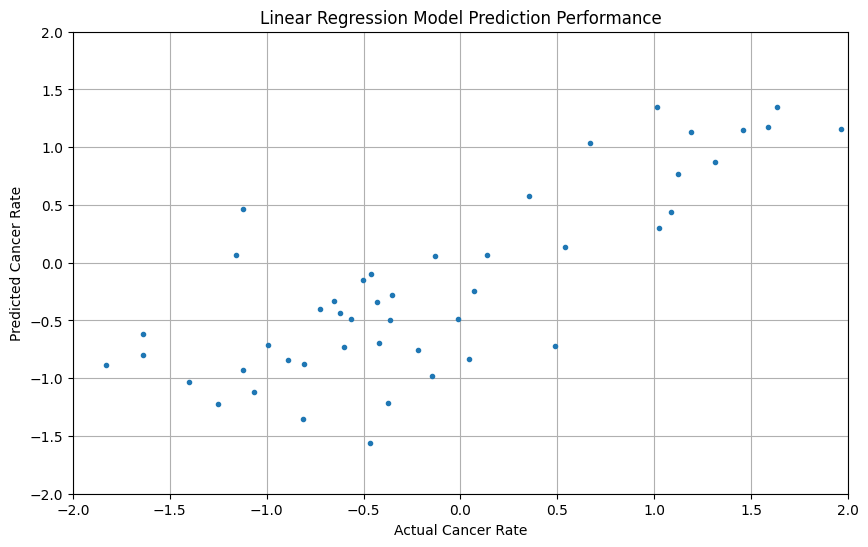

In [156]:
##################################
# Plotting the actual and predicted
# target variables
##################################
figure = plt.figure(figsize=(10,6))
axes = plt.axes()
plt.grid(True)
axes.plot(y_test, 
          linear_y_hat_test, 
          marker='o', 
          ls='', 
          ms=3.0)
lim = (-2, 2)
axes.set(xlabel='Actual Cancer Rate', 
         ylabel='Predicted Cancer Rate', 
         xlim=lim,
         ylim=lim,
         title='Linear Regression Model Prediction Performance');

### 1.6.3 Polynomial Regression <a class="anchor" id="1.6.3"></a>

[Polynomial Regression](https://link.springer.com/book/10.1007/978-1-4757-3462-1) explores the relationship between one or more covariates and a scalar response which is modelled as an nth degree polynomial of the covariates. The algorithm fits a nonlinear relationship between the value of the independent variables and the corresponding conditional mean of the dependent variable. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

1. The [polynomial regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented. 
2. The model contains 1 hyperparameter:
    * <span style="color: #FF0000">degree</span> = degree held constant at a value of 2
3. No hyperparameter tuning was conducted. 
4. The apparent model performance of the optimal model is summarized as follows:
    * **R-Squared** = 0.7908
    * **Mean Squared Error** = 0.2024
    * **Mean Absolute Error** = 0.3503
5. The independent test model performance of the final model is summarized as follows:
    * **R-Squared** = 0.6324
    * **Mean Squared Error** = 0.3844
    * **Mean Absolute Error** = 0.4867
6. Apparent and independent test model performance are relatively different, indicative of the presence of model overfitting.

In [157]:
##################################
# Defining a pipeline for the 
# polynomial regression model
##################################
polynomial_regression_pipeline = Pipeline([('polynomial_features', PolynomialFeatures(include_bias=False, degree=2)), 
                                           ('polynomial_regression', LinearRegression())])

##################################
# Fitting a polynomial regression model
##################################
polynomial_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('polynomial_regression', LinearRegression())])

In [158]:
##################################
# Evaluating the polynomial regression model
# on the train set
##################################
polynomial_y_hat_train = polynomial_regression_pipeline.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
polynomial_performance_train = model_performance_evaluation(y_train, polynomial_y_hat_train)
polynomial_performance_train['model'] = ['polynomial_regression'] * 3
polynomial_performance_train['set'] = ['train'] * 3
print('Polynomial Regression Model Performance on Train Data: ')
display(polynomial_performance_train)

Polynomial Regression Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,R2,0.7908,polynomial_regression,train
1,MSE,0.2024,polynomial_regression,train
2,MAE,0.3503,polynomial_regression,train


In [159]:
##################################
# Evaluating the polynomial regression model
# on the test set
##################################
polynomial_y_hat_test = polynomial_regression_pipeline.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
polynomial_performance_test = model_performance_evaluation(y_test, polynomial_y_hat_test)
polynomial_performance_test['model'] = ['polynomial_regression'] * 3
polynomial_performance_test['set'] = ['test'] * 3
print('Polynomial Regression Model Performance on Test Data: ')
display(polynomial_performance_test)

Polynomial Regression Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,R2,0.6324,polynomial_regression,test
1,MSE,0.3844,polynomial_regression,test
2,MAE,0.4867,polynomial_regression,test


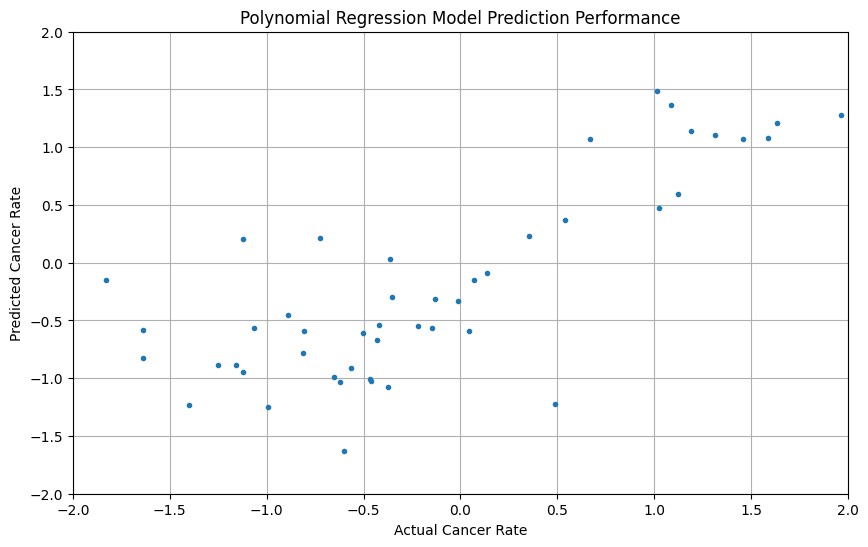

In [160]:
##################################
# Plotting the actual and predicted
# target variables
##################################
figure = plt.figure(figsize=(10,6))
axes = plt.axes()
plt.grid(True)
axes.plot(y_test, 
          polynomial_y_hat_test, 
          marker='o', 
          ls='', 
          ms=3.0)
lim = (-2, 2)
axes.set(xlabel='Actual Cancer Rate', 
         ylabel='Predicted Cancer Rate', 
         xlim=lim,
         ylim=lim,
         title='Polynomial Regression Model Prediction Performance');

### 1.6.4 Ridge Regression <a class="anchor" id="1.6.4"></a>

[Ridge Regression](https://www.tandfonline.com/doi/abs/10.1080/00401706.1970.10488634) is a regression technique aimed at preventing overfitting in linear regression models when the model is too complex and fits the training data very closely, but performs poorly on new and unseen data. The algorithm adds a penalty term (referred to as the L2 regularization) to the linear regression cost function that is proportional to the square of the magnitude of the coefficients. This approach helps to reduce the magnitude of the coefficients in the model, which in turn can prevent overfitting and is especially helpful where there are many correlated predictor variables in the model. A hyperparameter alpha serving as a constant that multiplies the L2 term thereby controlling regularization strength needs to be optimized through cross-validation.

1. The [ridge regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented. 
2. The model contains 1 hyperparameter:
    * <span style="color: #FF0000">alpha</span> = alpha made to vary across a range of values equal to 0.0001 to 1000
3. Hyperparameter tuning was conducted using the leave-one-out-cross-validation method with optimal model performance determined for: 
    * <span style="color: #FF0000">alpha</span> = 10
4. The apparent model performance of the optimal model is summarized as follows:
    * **R-Squared** = 0.6220
    * **Mean Squared Error** = 0.3659
    * **Mean Absolute Error** = 0.4680
5. The independent test model performance of the final model is summarized as follows:
    * **R-Squared** = 0.6352
    * **Mean Squared Error** = 0.3815
    * **Mean Absolute Error** = 0.4838
6. Apparent and independent test model performance are relatively comparable, indicative of the absence of model overfitting.

In [161]:
##################################
# Defining the hyperparameters
# for the ridge regression model
##################################
alphas = [0.0001,0.001,0.01,0.1,1,10,100,1000]

##################################
# Formulating a string equivalent 
# of the alpha hyperparameter list
##################################
alphas_string = map(str, alphas)
alphas_string = list(alphas_string)

##################################
# Defining a pipeline for the 
# ridge regression model
##################################
ridge_regression_pipeline = Pipeline([('polynomial_features', PolynomialFeatures(include_bias=False, degree=1)), 
                                      ('ridge_regression', RidgeCV(alphas=alphas, cv=None, store_cv_values=True))])

##################################
# Fitting a ridge regression model
##################################
ridge_regression_pipeline.fit(X_train, y_train)

D:\Github_Codes\ProjectPortfolio\Portfolio_Project_40\mlexplore_venv\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ridge_regression',
                 RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         store_cv_values=True))])

In [162]:
##################################
# Determining the optimal alpha
##################################
ridge_regression_pipeline['ridge_regression'].alpha_

np.float64(10.0)

In [163]:
##################################
# Consolidating the LOOCV results
##################################
ridge_regression_pipeline['ridge_regression'].cv_values_
ridge_regression_LOOCV = pd.DataFrame(ridge_regression_pipeline['ridge_regression'].cv_values_,columns=map(str, alphas) )
ridge_regression_LOOCV.index.name = 'case_index'
ridge_regression_LOOCV.reset_index(inplace=True)
ridge_regression_LOOCV = pd.melt(ridge_regression_LOOCV, 
                                 id_vars = ['case_index'], 
                                 value_vars = alphas_string, 
                                 ignore_index = False)
ridge_regression_LOOCV.rename(columns = {'variable':'alpha', 'value':'MSE'}, inplace = True)
display(ridge_regression_LOOCV)

D:\Github_Codes\ProjectPortfolio\Portfolio_Project_40\mlexplore_venv\Lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


,case_index,alpha,MSE
0,0,0.0001,0.0012
1,1,0.0001,0.0058
2,2,0.0001,0.0872
3,3,0.0001,0.3473
4,4,0.0001,0.1755
...,...,...,...
109,109,1000,0.1383
110,110,1000,0.5213
111,111,1000,1.7320
112,112,1000,0.0289


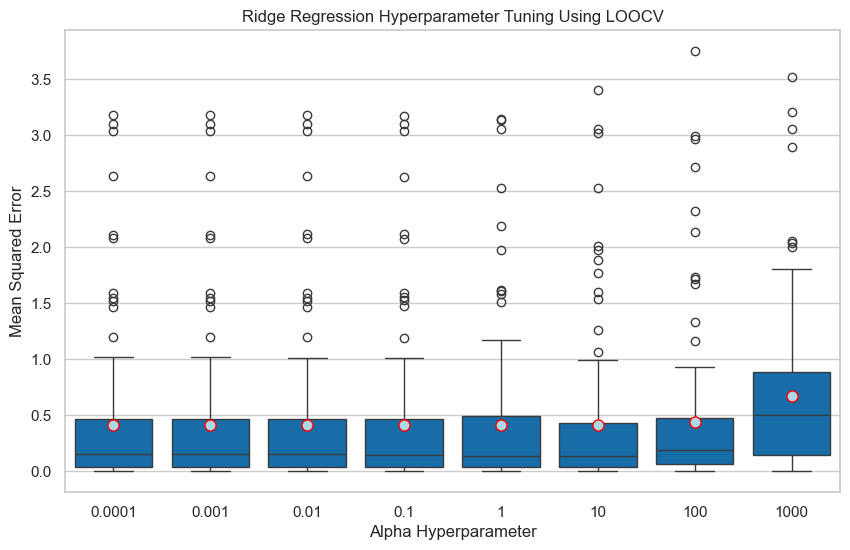

In [164]:
##################################
# Plotting the ridge regression
# hyperparameter tuning results
# using LOOCV
##################################
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.boxplot(x='alpha', 
            y='MSE', 
            data=ridge_regression_LOOCV, 
            color="#0070C0",
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'#ADD8E6', 
                       'markeredgecolor':'#FF0000',
                       'markersize':'8'})
plt.xlabel('Alpha Hyperparameter')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Hyperparameter Tuning Using LOOCV')
plt.show()

In [165]:
##################################
# Evaluating the ridge regression model
# on the train set
##################################
ridge_y_hat_train = ridge_regression_pipeline.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
ridge_performance_train = model_performance_evaluation(y_train, ridge_y_hat_train)
ridge_performance_train['model'] = ['ridge_regression'] * 3
ridge_performance_train['set'] = ['train'] * 3
print('Ridge Regression Model Performance on Train Data: ')
display(ridge_performance_train)

Ridge Regression Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,R2,0.6220,ridge_regression,train
1,MSE,0.3659,ridge_regression,train
2,MAE,0.4680,ridge_regression,train


In [166]:
##################################
# Evaluating the ridge regression model
# on the test set
##################################
ridge_y_hat_test = ridge_regression_pipeline.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
ridge_performance_test = model_performance_evaluation(y_test, ridge_y_hat_test)
ridge_performance_test['model'] = ['ridge_regression'] * 3
ridge_performance_test['set'] = ['test'] * 3
print('Ridge Regression Model Performance on Test Data: ')
display(ridge_performance_test)

Ridge Regression Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,R2,0.6352,ridge_regression,test
1,MSE,0.3815,ridge_regression,test
2,MAE,0.4838,ridge_regression,test


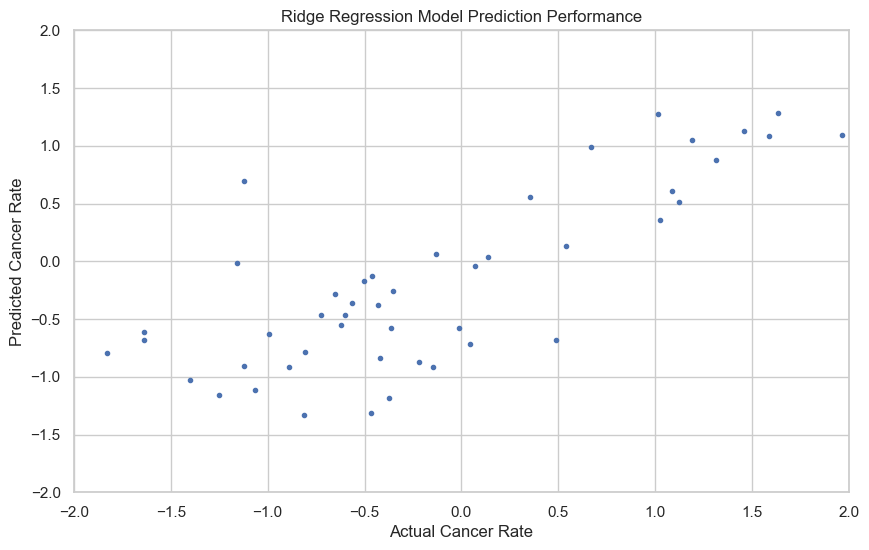

In [167]:
##################################
# Plotting the actual and predicted
# target variables
##################################
figure = plt.figure(figsize=(10,6))
axes = plt.axes()
plt.grid(True)
axes.plot(y_test, 
          ridge_y_hat_test, 
          marker='o', 
          ls='', 
          ms=3.0)
lim = (-2, 2)
axes.set(xlabel='Actual Cancer Rate', 
         ylabel='Predicted Cancer Rate', 
         xlim=lim,
         ylim=lim,
         title='Ridge Regression Model Prediction Performance');

### 1.6.5 Least Absolute Shrinkage and Selection Operator Regression <a class="anchor" id="1.6.5"></a>

[Least Absolute Shrinkage and Selection Operator Regression](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1996.tb02080.x) is a regression technique aimed at preventing overfitting in linear regression models when the model is too complex and fits the training data very closely, but performs poorly on new and unseen data. The algorithm adds a penalty term (referred to as the L1 regularization) to the linear regression cost function that is proportional to the absolute value of the coefficients. This approach can be useful for feature selection, as it tends to shrink the coefficients of less important predictor variables to zero, which can help simplify the model and improve its interpretability. A hyperparameter alpha serving as a constant that multiplies the L1 term thereby controlling regularization strength needs to be optimized through cross-validation.

1. The [lasso regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented. 
2. The model contains 1 hyperparameter:
    * <span style="color: #FF0000">alpha</span> = alpha made to vary across a range of values equal to 0.0001 to 1000
3. Hyperparameter tuning was conducted using the leave-one-out-cross-validation method with optimal model performance determined for: 
    * <span style="color: #FF0000">alpha</span> = 0.01
4. The apparent model performance of the optimal model is summarized as follows:
    * **R-Squared** = 0.6295
    * **Mean Squared Error** = 0.3586
    * **Mean Absolute Error** = 0.4608
5. The independent test model performance of the final model is summarized as follows:
    * **R-Squared** = 0.6405
    * **Mean Squared Error** = 0.3760
    * **Mean Absolute Error** = 0.4805
6. Apparent and independent test model performance are relatively comparable, indicative of the absence of model overfitting.

In [168]:
##################################
# Defining the hyperparameters
# for the lasso regression model
##################################
alphas = [0.0001,0.001,0.01,0.1,1,10,100,1000]

##################################
# Formulating a string equivalent 
# of the alpha hyperparameter list
##################################
alphas_string = map(str, alphas)
alphas_string = list(alphas_string)

##################################
# Defining a pipeline for the 
# lasso regression model
##################################
lasso_regression_pipeline = Pipeline([('polynomial_features', PolynomialFeatures(include_bias=False, degree=1)), 
                                      ('lasso_regression', LassoCV(alphas=alphas, cv=LeaveOneOut()))])

##################################
# Fitting a lasso regression model
##################################
lasso_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('lasso_regression',
                 LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         cv=LeaveOneOut()))])

In [169]:
##################################
# Determining the optimal alpha
##################################
lasso_regression_pipeline['lasso_regression'].alpha_

np.float64(0.01)

In [170]:
##################################
# Consolidating the LOOCV results
##################################
lasso_regression_pipeline['lasso_regression'].mse_path_
lasso_regression_LOOCV = pd.DataFrame(lasso_regression_pipeline['lasso_regression'].mse_path_.transpose())
lasso_regression_LOOCV = lasso_regression_LOOCV[[7,6,5,4,3,2,1,0]]
lasso_regression_LOOCV = lasso_regression_LOOCV.set_axis(map(str, alphas), axis=1)
lasso_regression_LOOCV.index.name = 'case_index'
lasso_regression_LOOCV.reset_index(inplace=True)
display(lasso_regression_LOOCV)

,case_index,0.0001,0.001,0.01,0.1,1,10,100,1000
0,0,0.0011,0.0007,0.0009,0.0000,0.0020,0.0020,0.0020,0.0020
1,1,0.0058,0.0057,0.0053,0.0074,1.5211,1.5211,1.5211,1.5211
2,2,0.0872,0.0872,0.0894,0.2171,1.5328,1.5328,1.5328,1.5328
3,3,0.3470,0.3452,0.3919,0.3913,0.1931,0.1931,0.1931,0.1931
4,4,0.1760,0.1800,0.2250,0.5213,2.3015,2.3015,2.3015,2.3015
...,...,...,...,...,...,...,...,...,...
109,109,0.1380,0.1374,0.1589,0.2133,0.1710,0.1710,0.1710,0.1710
110,110,0.0088,0.0075,0.0007,0.0089,1.1168,1.1168,1.1168,1.1168
111,111,2.1149,2.1371,2.3557,2.5285,1.1061,1.1061,1.1061,1.1061
112,112,0.0013,0.0020,0.0164,0.0582,0.0015,0.0015,0.0015,0.0015


In [171]:
##################################
# Transforming the dataframe
# detailing the LOOCV results
##################################
lasso_regression_LOOCV = pd.melt(lasso_regression_LOOCV, 
                                 id_vars = ['case_index'], 
                                 value_vars = alphas_string, 
                                 ignore_index = False)
lasso_regression_LOOCV.rename(columns = {'variable':'alpha', 'value':'MSE'}, inplace = True)
display(lasso_regression_LOOCV)

,case_index,alpha,MSE
0,0,0.0001,0.0011
1,1,0.0001,0.0058
2,2,0.0001,0.0872
3,3,0.0001,0.3470
4,4,0.0001,0.1760
...,...,...,...
109,109,1000,0.1710
110,110,1000,1.1168
111,111,1000,1.1061
112,112,1000,0.0015


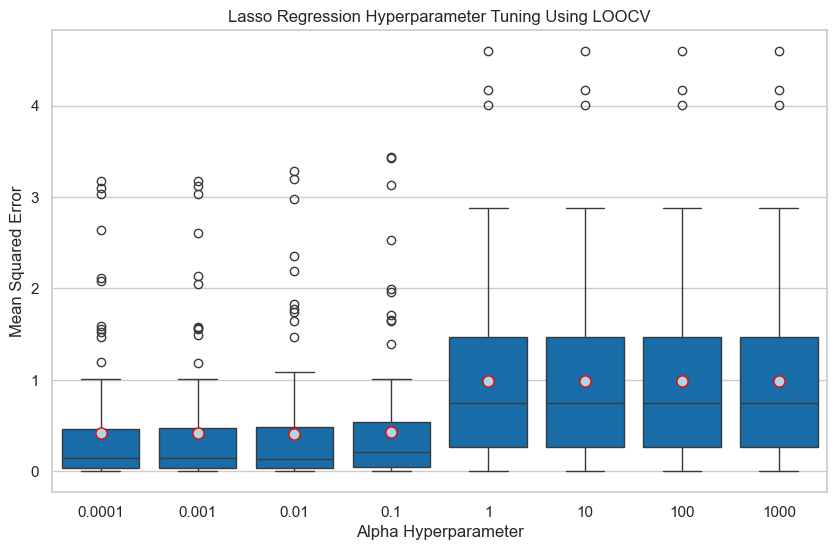

In [172]:
##################################
# Plotting the lasso regression
# hyperparameter tuning results
# using LOOCV
##################################
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.boxplot(x='alpha', 
            y='MSE', 
            data=lasso_regression_LOOCV, 
            color='#0070C0',
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'#ADD8E6', 
                       'markeredgecolor':'#FF0000',
                       'markersize':'8'})
plt.xlabel('Alpha Hyperparameter')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression Hyperparameter Tuning Using LOOCV')
plt.show()

In [173]:
##################################
# Evaluating the lasso regression model
# on the train set
##################################
lasso_y_hat_train = lasso_regression_pipeline.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
lasso_performance_train = model_performance_evaluation(y_train, lasso_y_hat_train)
lasso_performance_train['model'] = ['lasso_regression'] * 3
lasso_performance_train['set'] = ['train'] * 3
print('Lasso Regression Model Performance on Train Data: ')
display(lasso_performance_train)

Lasso Regression Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,R2,0.6295,lasso_regression,train
1,MSE,0.3586,lasso_regression,train
2,MAE,0.4608,lasso_regression,train


In [174]:
##################################
# Evaluating the lasso regression model
# on the test set
##################################
lasso_y_hat_test = lasso_regression_pipeline.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
lasso_performance_test = model_performance_evaluation(y_test, lasso_y_hat_test)
lasso_performance_test['model'] = ['lasso_regression'] * 3
lasso_performance_test['set'] = ['test'] * 3
print('Lasso Regression Model Performance on Test Data: ')
display(lasso_performance_test)

Lasso Regression Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,R2,0.6405,lasso_regression,test
1,MSE,0.3760,lasso_regression,test
2,MAE,0.4805,lasso_regression,test


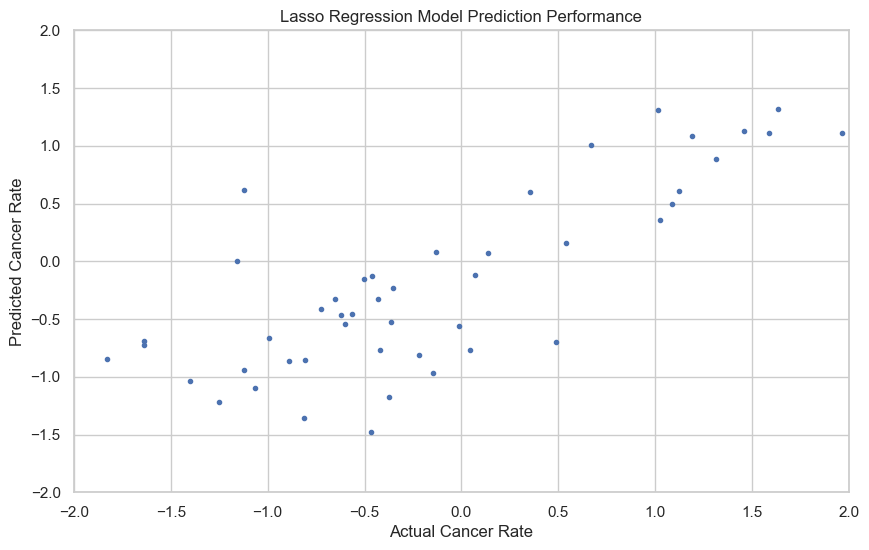

In [175]:
##################################
# Plotting the actual and predicted
# target variables
##################################
figure = plt.figure(figsize=(10,6))
axes = plt.axes()
plt.grid(True)
axes.plot(y_test, 
          lasso_y_hat_test, 
          marker='o', 
          ls='', 
          ms=3.0)
lim = (-2, 2)
axes.set(xlabel='Actual Cancer Rate', 
         ylabel='Predicted Cancer Rate', 
         xlim=lim,
         ylim=lim,
         title='Lasso Regression Model Prediction Performance');

### 1.6.6 Elastic Net Regression <a class="anchor" id="1.6.6"></a>

[Elastic Net Regression](https://rss.onlinelibrary.wiley.com/doi/10.1111/j.1467-9868.2005.00503.x) is a regression technique aimed at preventing overfitting in linear regression models when the model is too complex and fits the training data very closely, but performs poorly on new and unseen data. The algorithm is a combination of the ridge and LASSO regression methods, by adding both L1 and L2 regularization terms in the cost function. This approach can be useful when there are many predictor variables that are correlated with the response variable, but only a subset of them are truly important for predicting the response. The L1 regularization term can help to select the important variables, while the L2 regularization term can help to reduce the magnitude of the coefficients. Hyperparameters alpha which serves as the constant that multiplies the penalty terms, and l1_ratio that serves as the mixing parameter that penalizes as a combination of L1 and L2 regularization - need to be optimized through cross-validation.

1. The [elastic net regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) from the <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library API was implemented. 
2. The model contains 2 hyperparameters:
    * <span style="color: #FF0000">l1_ratio</span> = l1_ratio made to vary across a range of values equal to 0.1 to 0.9
    * <span style="color: #FF0000">alpha</span> = alpha made to vary across a range of values equal to 0.0001 to 1000
3. Hyperparameter tuning was conducted using the leave-one-out-cross-validation method with optimal model performance determined for: 
    * <span style="color: #FF0000">l1_ratio</span> = 0.9
    * <span style="color: #FF0000">alpha</span> = 0.01
4. The apparent model performance of the optimal model is summarized as follows:
    * **R-Squared** = 0.6298
    * **Mean Squared Error** = 0.3582
    * **Mean Absolute Error** = 0.4608
5. The independent test model performance of the final model is summarized as follows:
    * **R-Squared** = 0.6409
    * **Mean Squared Error** = 0.3755
    * **Mean Absolute Error** = 0.4800
6. Apparent and independent test model performance are relatively comparable, indicative of the absence of model overfitting.

In [176]:
##################################
# Defining the hyperparameters
# for the elastic-net regression model
##################################
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alphas = [0.0001,0.001,0.01,0.1,1,10,100,1000]

##################################
# Formulating a string equivalent 
# of the l1_ratio hyperparameter list
##################################
l1_ratios_string = map(str, l1_ratios)
l1_ratios_string_reversed = list(l1_ratios_string)
l1_ratios_string_reversed.reverse()

##################################
# Formulating a string equivalent 
# of the alpha hyperparameter list
##################################
alphas_string = map(str, alphas)
alphas_string_reversed = list(alphas_string)
alphas_string_reversed.reverse()

##################################
# Defining a pipeline for the 
# elastic-net regression model
##################################
elasticnet_regression_pipeline = Pipeline([('polynomial_features', PolynomialFeatures(include_bias=False, degree=1)), 
                                           ('elasticnet_regression', ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=LeaveOneOut()))])

##################################
# Fitting an elastic-net regression model
##################################
elasticnet_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('elasticnet_regression',
                 ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                      1000],
                              cv=LeaveOneOut(),
                              l1_ratio=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                        0.9]))])

In [177]:
##################################
# Determining the optimal alpha
##################################
elasticnet_regression_pipeline['elasticnet_regression'].alpha_

np.float64(0.01)

In [178]:
##################################
# Determining the optimal l1_ratio
##################################
elasticnet_regression_pipeline['elasticnet_regression'].l1_ratio_

np.float64(0.9)

In [179]:
##################################
# Consolidating the LOOCV results
##################################
elasticnet_regression_LOOCV_raw = elasticnet_regression_pipeline['elasticnet_regression'].mse_path_
elasticnet_regression_LOOCV = pd.DataFrame(elasticnet_regression_LOOCV_raw.reshape(-1, 114))
elasticnet_regression_LOOCV.index = np.repeat(np.arange(elasticnet_regression_LOOCV_raw.shape[0]), elasticnet_regression_LOOCV_raw.shape[1]) + 1
elasticnet_regression_LOOCV.index.name = 'l1_ratio'
elasticnet_regression_LOOCV.reset_index(inplace=True)

In [180]:
##################################
# Creating a dataframe based on l1_ratio
# from the LOOCV results
##################################
elasticnet_regression_LOOCV_l1_ratio = elasticnet_regression_LOOCV
display(elasticnet_regression_LOOCV_l1_ratio)

,l1_ratio,0,1,2,3,4,5,6,7,8,...,104,105,106,107,108,109,110,111,112,113
0,1,0.0020,1.5211,1.5328,0.1931,2.3015,0.6067,0.2884,1.2766,0.4167,...,0.0133,0.9307,2.7951,2.2956,0.6066,0.1710,1.1168,1.1061,0.0015,0.2579
1,1,0.0020,1.5211,1.5328,0.1931,2.3015,0.6067,0.2884,1.2766,0.4167,...,0.0133,0.9307,2.7951,2.2956,0.6066,0.1710,1.1168,1.1061,0.0015,0.2579
2,1,0.0020,1.5211,1.5328,0.1931,2.3015,0.6067,0.2884,1.2766,0.4167,...,0.0133,0.9307,2.7951,2.2956,0.6066,0.1710,1.1168,1.1061,0.0015,0.2579
3,1,0.0022,0.1173,0.3284,0.2850,0.8757,0.8514,0.1458,0.2705,0.0295,...,0.0014,1.8480,1.5636,0.6217,0.3866,0.1205,0.1191,2.3643,0.0781,0.0792
4,1,0.0049,0.0010,0.0994,0.3206,0.3641,0.8689,0.5433,0.0626,0.0132,...,0.0081,2.0241,1.5584,0.1701,0.3002,0.1235,0.0001,2.6688,0.0987,0.3930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,9,0.0020,1.5211,1.5328,0.1931,2.3015,0.6067,0.2884,1.2766,0.4167,...,0.0133,0.9307,2.7951,2.2956,0.6066,0.1710,1.1168,1.1061,0.0015,0.2579
68,9,0.0001,0.0051,0.2029,0.3840,0.5113,0.8459,0.4257,0.1601,0.0067,...,0.0027,1.9887,1.6780,0.2703,0.2514,0.2032,0.0066,2.5404,0.0650,0.2614
69,9,0.0007,0.0052,0.0875,0.3870,0.2200,0.8004,0.7328,0.0480,0.0338,...,0.0085,1.7579,1.8444,0.1508,0.3006,0.1555,0.0007,2.3405,0.0158,0.2965
70,9,0.0007,0.0057,0.0872,0.3448,0.1798,0.7830,0.7569,0.0328,0.0315,...,0.0233,1.5690,2.0451,0.1154,0.2950,0.1373,0.0076,2.1355,0.0020,0.2146


In [181]:
##################################
# Creating a dataframe based on alpha
# from the LOOCV results
##################################
elasticnet_regression_LOOCV_alpha = elasticnet_regression_LOOCV.drop(['l1_ratio'], axis=1)
elasticnet_regression_LOOCV_alpha['alpha'] = list(range(1,9))*9
display(elasticnet_regression_LOOCV_alpha)

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,alpha
0,0.0020,1.5211,1.5328,0.1931,2.3015,0.6067,0.2884,1.2766,0.4167,0.2884,...,0.9307,2.7951,2.2956,0.6066,0.1710,1.1168,1.1061,0.0015,0.2579,1
1,0.0020,1.5211,1.5328,0.1931,2.3015,0.6067,0.2884,1.2766,0.4167,0.2884,...,0.9307,2.7951,2.2956,0.6066,0.1710,1.1168,1.1061,0.0015,0.2579,2
2,0.0020,1.5211,1.5328,0.1931,2.3015,0.6067,0.2884,1.2766,0.4167,0.2884,...,0.9307,2.7951,2.2956,0.6066,0.1710,1.1168,1.1061,0.0015,0.2579,3
3,0.0022,0.1173,0.3284,0.2850,0.8757,0.8514,0.1458,0.2705,0.0295,0.0002,...,1.8480,1.5636,0.6217,0.3866,0.1205,0.1191,2.3643,0.0781,0.0792,4
4,0.0049,0.0010,0.0994,0.3206,0.3641,0.8689,0.5433,0.0626,0.0132,0.0433,...,2.0241,1.5584,0.1701,0.3002,0.1235,0.0001,2.6688,0.0987,0.3930,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.0020,1.5211,1.5328,0.1931,2.3015,0.6067,0.2884,1.2766,0.4167,0.2884,...,0.9307,2.7951,2.2956,0.6066,0.1710,1.1168,1.1061,0.0015,0.2579,4
68,0.0001,0.0051,0.2029,0.3840,0.5113,0.8459,0.4257,0.1601,0.0067,0.0189,...,1.9887,1.6780,0.2703,0.2514,0.2032,0.0066,2.5404,0.0650,0.2614,5
69,0.0007,0.0052,0.0875,0.3870,0.2200,0.8004,0.7328,0.0480,0.0338,0.0796,...,1.7579,1.8444,0.1508,0.3006,0.1555,0.0007,2.3405,0.0158,0.2965,6
70,0.0007,0.0057,0.0872,0.3448,0.1798,0.7830,0.7569,0.0328,0.0315,0.0752,...,1.5690,2.0451,0.1154,0.2950,0.1373,0.0076,2.1355,0.0020,0.2146,7


In [182]:
##################################
# Transforming the l1_ratio dataframe
# detailing the LOOCV results
##################################
elasticnet_regression_LOOCV_l1_ratio = pd.melt(elasticnet_regression_LOOCV_l1_ratio, 
                                               id_vars=['l1_ratio'], 
                                               value_vars=list(range(0,114)), 
                                               ignore_index=False)
elasticnet_regression_LOOCV_l1_ratio.rename(columns = {'variable':'case_index', 'value':'MSE'}, inplace = True)
display(elasticnet_regression_LOOCV_l1_ratio)

,l1_ratio,case_index,MSE
0,1,0,0.0020
1,1,0,0.0020
2,1,0,0.0020
3,1,0,0.0022
4,1,0,0.0049
...,...,...,...
67,9,113,0.2579
68,9,113,0.2614
69,9,113,0.2965
70,9,113,0.2146


In [183]:
##################################
# Renaming the l1_ratio levels
# based on the proper category labels
##################################
elasticnet_regression_LOOCV_l1_ratio_conditions = [
    (elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] == 1),
    (elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] == 2),
    (elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] == 3),
    (elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] == 4),
    (elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] == 5),
    (elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] == 6),
    (elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] == 7),
    (elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] == 8),
    (elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] == 9)]

elasticnet_regression_LOOCV_l1_ratio_values = l1_ratios_string_reversed
elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] = np.select(elasticnet_regression_LOOCV_l1_ratio_conditions,
                                                             elasticnet_regression_LOOCV_l1_ratio_values,
                                                             default=str(np.nan))
elasticnet_regression_LOOCV_l1_ratio['l1_ratio'] = elasticnet_regression_LOOCV_l1_ratio['l1_ratio'].astype('category')

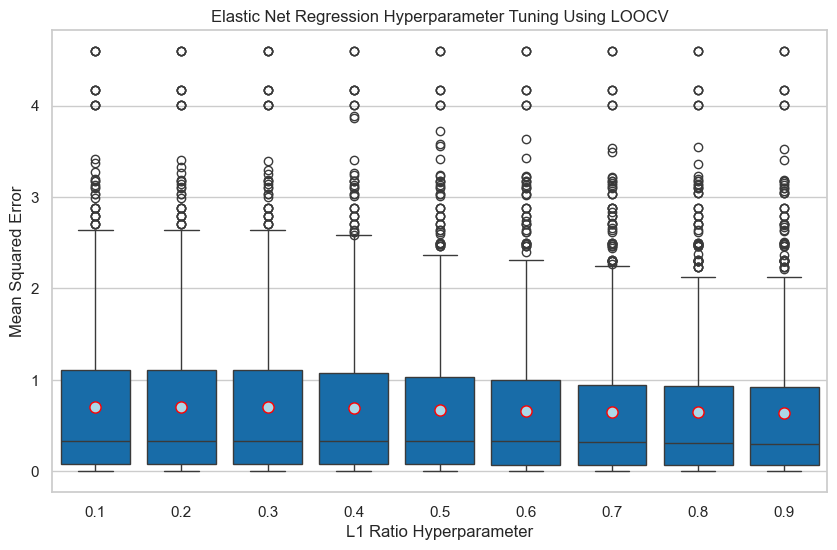

In [184]:
##################################
# Plotting the elasticnet regression
# hyperparameter tuning results
# using LOOCV
##################################
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.boxplot(x='l1_ratio', 
            y='MSE', 
            data=elasticnet_regression_LOOCV_l1_ratio, 
            color='#0070C0', 
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'#ADD8E6', 
                       'markeredgecolor':'#FF0000',
                       'markersize':'8'})
plt.xlabel('L1 Ratio Hyperparameter')
plt.ylabel('Mean Squared Error')
plt.title('Elastic Net Regression Hyperparameter Tuning Using LOOCV')
plt.show()

In [185]:
##################################
# Transforming the alpha dataframe
# detailing the LOOCV results
##################################
elasticnet_regression_LOOCV_alpha = pd.melt(elasticnet_regression_LOOCV_alpha, 
                                               id_vars=['alpha'], 
                                               value_vars=list(range(0,114)), 
                                               ignore_index=False)
elasticnet_regression_LOOCV_alpha.rename(columns = {'variable':'case_index', 'value':'MSE'}, inplace = True)
display(elasticnet_regression_LOOCV_alpha)

,alpha,case_index,MSE
0,1,0,0.0020
1,2,0,0.0020
2,3,0,0.0020
3,4,0,0.0022
4,5,0,0.0049
...,...,...,...
67,4,113,0.2579
68,5,113,0.2614
69,6,113,0.2965
70,7,113,0.2146


In [186]:
##################################
# Renaming the alpha levels
# based on the proper category labels
##################################
elasticnet_regression_LOOCV_alpha_conditions = [
    (elasticnet_regression_LOOCV_alpha['alpha'] == 1),
    (elasticnet_regression_LOOCV_alpha['alpha'] == 2),
    (elasticnet_regression_LOOCV_alpha['alpha'] == 3),
    (elasticnet_regression_LOOCV_alpha['alpha'] == 4),
    (elasticnet_regression_LOOCV_alpha['alpha'] == 5),
    (elasticnet_regression_LOOCV_alpha['alpha'] == 6),
    (elasticnet_regression_LOOCV_alpha['alpha'] == 7),
    (elasticnet_regression_LOOCV_alpha['alpha'] == 8)]

elasticnet_regression_LOOCV_alpha_values = alphas_string_reversed
elasticnet_regression_LOOCV_alpha['alpha'] = np.select(elasticnet_regression_LOOCV_alpha_conditions,
                                                       elasticnet_regression_LOOCV_alpha_values,
                                                       default=str(np.nan))
elasticnet_regression_LOOCV_alpha['alpha'] = elasticnet_regression_LOOCV_alpha['alpha'].astype('category')

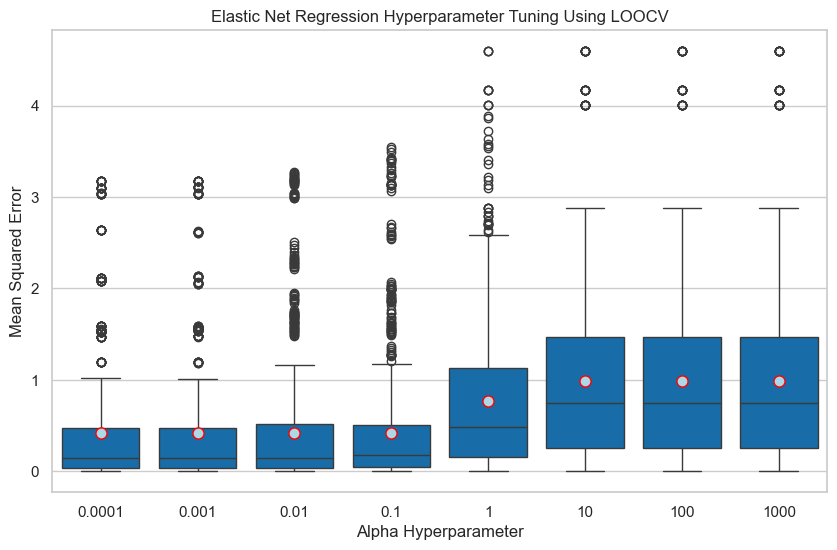

In [187]:
##################################
# Plotting the elasticnet regression
# hyperparameter tuning results
# using LOOCV
##################################
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.boxplot(x='alpha', 
            y='MSE', 
            data=elasticnet_regression_LOOCV_alpha, 
            color='#0070C0', 
            showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'#ADD8E6', 
                       'markeredgecolor':'#FF0000',
                       'markersize':'8'})
plt.xlabel('Alpha Hyperparameter')
plt.ylabel('Mean Squared Error')
plt.title('Elastic Net Regression Hyperparameter Tuning Using LOOCV')
plt.show()

In [188]:
##################################
# Evaluating the elastic-net regression model
# on the train set
##################################
elasticnet_y_hat_train = elasticnet_regression_pipeline.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
elasticnet_performance_train = model_performance_evaluation(y_train, elasticnet_y_hat_train)
elasticnet_performance_train['model'] = ['elasticnet_regression'] * 3
elasticnet_performance_train['set'] = ['train'] * 3
print('Elastic Net Regression Model Performance on Train Data: ')
display(elasticnet_performance_train)

Elastic Net Regression Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,R2,0.6298,elasticnet_regression,train
1,MSE,0.3582,elasticnet_regression,train
2,MAE,0.4608,elasticnet_regression,train


In [189]:
##################################
# Evaluating the elastic-net regression model
# on the test set
##################################
elasticnet_y_hat_test = elasticnet_regression_pipeline.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
elasticnet_performance_test = model_performance_evaluation(y_test, elasticnet_y_hat_test)
elasticnet_performance_test['model'] = ['elasticnet_regression'] * 3
elasticnet_performance_test['set'] = ['test'] * 3
print('Elastic Net Regression Model Performance on Test Data: ')
display(elasticnet_performance_test)

Elastic Net Regression Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,R2,0.6409,elasticnet_regression,test
1,MSE,0.3755,elasticnet_regression,test
2,MAE,0.4800,elasticnet_regression,test


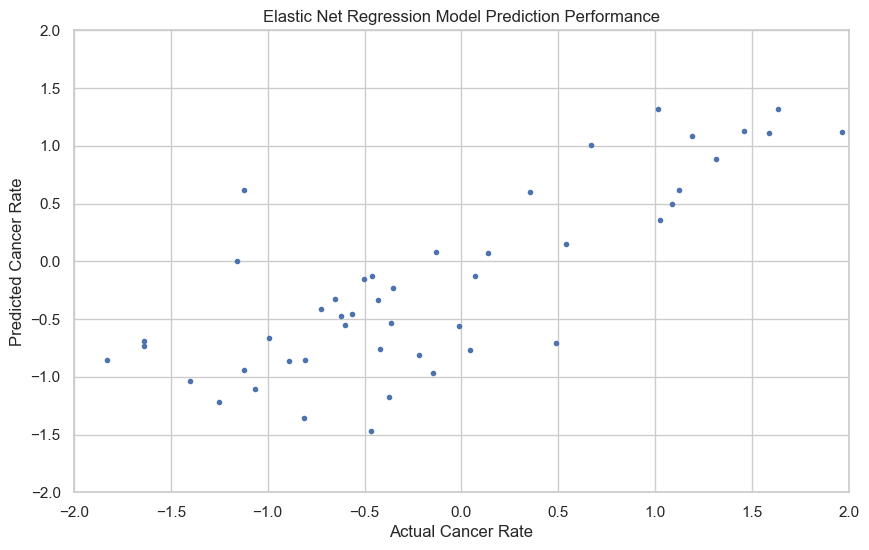

In [190]:
##################################
# Plotting the actual and predicted
# target variables
##################################
figure = plt.figure(figsize=(10,6))
axes = plt.axes()
plt.grid(True)
axes.plot(y_test, 
          elasticnet_y_hat_test, 
          marker='o', 
          ls='', 
          ms=3.0)
lim = (-2, 2)
axes.set(xlabel='Actual Cancer Rate', 
         ylabel='Predicted Cancer Rate', 
         xlim=lim,
         ylim=lim,
         title='Elastic Net Regression Model Prediction Performance');

## 1.7. Consolidated Findings <a class="anchor" id="1.7"></a>

1. The [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) demonstrated the best independent test model performance among the candidate models. This model which did not apply any form of regularization proved to be more superior than the penalized models potentially due to the presence of a smaller subset of equally informative predictors - leading to a minimal over-confidence in the parameter estimates and in effect, minimal impact of the regularization constraints.
    * **R-Squared** = 0.6446
    * **Mean Squared Error** = 0.3716
    * **Mean Absolute Error** = 0.4773
3. Among the penalized models, the optimal [elastic net regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) demonstrated the best independent test model performance with the tuned hyperparameter leaning towards a higher L1 regularization effect (optimal L1 ratio equals 0.9 which is reminiscent of lasso where L1 ratio equals 1.0).
    * **R-Squared** = 0.6409
    * **Mean Squared Error** = 0.3755
    * **Mean Absolute Error** = 0.4800
2. The optimal [lasso regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) using an L1 regularization term demonstrated an equally high independent test model performance, confirming the earlier findings.
    * **R-Squared** = 0.6405
    * **Mean Squared Error** = 0.3760
    * **Mean Absolute Error** = 0.4805
3. The optimal [ridge regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) using an L2 regularization term equally demonstrated good independent test model performance.
    * **R-Squared** = 0.6352
    * **Mean Squared Error** = 0.3815
    * **Mean Absolute Error** = 0.4838
4. The [polynomial regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) demonstrated the worst independent test model performance. In addition, metrics obtained from the apparent and independent test model performance are relatively different, indicative of the presence of model overfitting.
    * **R-Squared** = 0.6324
    * **Mean Squared Error** = 0.3844
    * **Mean Absolute Error** = 0.4867
5. The computed r-squared metrics for the formulated models were relatively low - only ranging from 0.63 to 0.65, which could be further improved by:
    * Considering more informative predictors
    * Considering more complex models other than linear regression and its variants

In [191]:
##################################
# Consolidating all the
# model performance measures
##################################
performance_comparison = pd.concat([linear_performance_train, 
                                    linear_performance_test,
                                    polynomial_performance_train, 
                                    polynomial_performance_test,
                                    ridge_performance_train, 
                                    ridge_performance_test,
                                    lasso_performance_train, 
                                    lasso_performance_test,
                                    elasticnet_performance_train, 
                                    elasticnet_performance_test], 
                                   ignore_index=True)
print('Consolidated Model Performance on Train and Test Data: ')
display(performance_comparison)

Consolidated Model Performance on Train and Test Data: 


,metric_name,metric_value,model,set
0,R2,0.6332,linear_regression,train
1,MSE,0.3550,linear_regression,train
2,MAE,0.4609,linear_regression,train
3,R2,0.6446,linear_regression,test
4,MSE,0.3716,linear_regression,test
5,MAE,0.4773,linear_regression,test
6,R2,0.7908,polynomial_regression,train
7,MSE,0.2024,polynomial_regression,train
8,MAE,0.3503,polynomial_regression,train
9,R2,0.6324,polynomial_regression,test


In [192]:
##################################
# Consolidating all the R2
# model performance measures
##################################
performance_comparison_R2 = performance_comparison[performance_comparison['metric_name']=='R2']
performance_comparison_R2_train = performance_comparison_R2[performance_comparison_R2['set']=='train'].loc[:,"metric_value"]
performance_comparison_R2_test = performance_comparison_R2[performance_comparison_R2['set']=='test'].loc[:,"metric_value"]

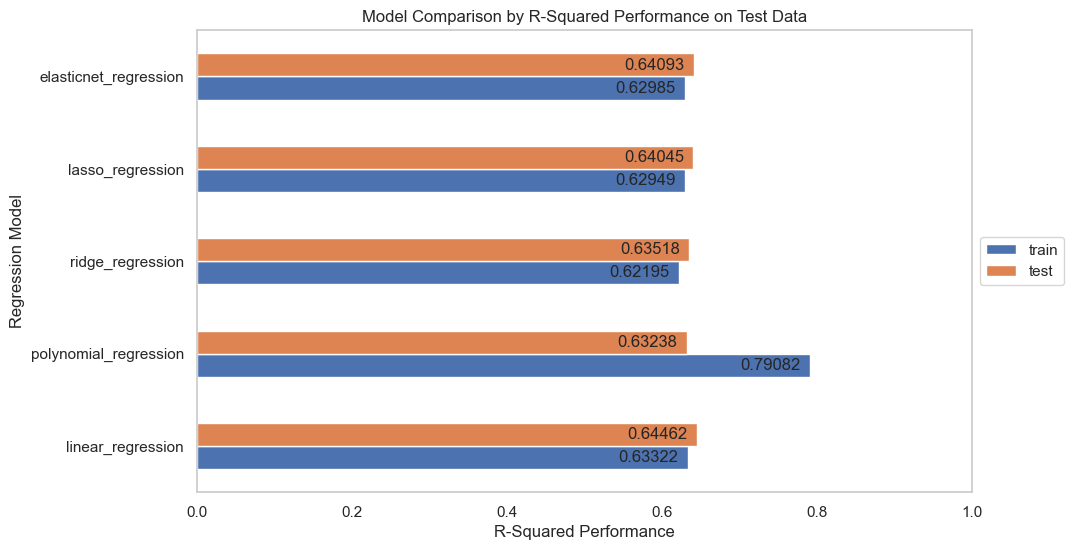

In [193]:
##################################
# Plotting all the R2
# model performance measures
# between train and test sets
##################################
performance_comparison_R2_plot = pd.DataFrame({'train': performance_comparison_R2_train.values,
                                              'test': performance_comparison_R2_test.values},
                                              index=performance_comparison_R2['model'].unique())
performance_comparison_R2_plot = performance_comparison_R2_plot.plot.barh(figsize=(10, 6))
performance_comparison_R2_plot.set_xlim(0.00,1.00)
performance_comparison_R2_plot.set_title("Model Comparison by R-Squared Performance on Test Data")
performance_comparison_R2_plot.set_xlabel("R-Squared Performance")
performance_comparison_R2_plot.set_ylabel("Regression Model")
performance_comparison_R2_plot.grid(False)
performance_comparison_R2_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in performance_comparison_R2_plot.containers:
    performance_comparison_R2_plot.bar_label(container, fmt='%.5f', padding=-50)

In [194]:
##################################
# Consolidating all the MSE
# model performance measures
##################################
performance_comparison_MSE = performance_comparison[performance_comparison['metric_name']=='MSE']
performance_comparison_MSE_train = performance_comparison_MSE[performance_comparison_MSE['set']=='train'].loc[:,"metric_value"]
performance_comparison_MSE_test = performance_comparison_MSE[performance_comparison_MSE['set']=='test'].loc[:,"metric_value"]

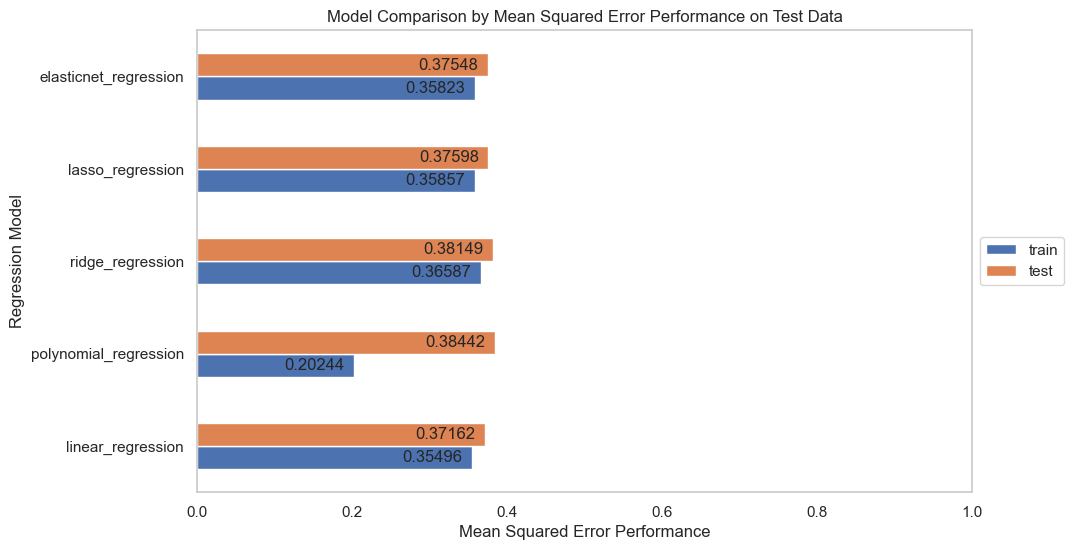

In [195]:
##################################
# Plotting all the MSE
# model performance measures
# between train and test sets
##################################
performance_comparison_MSE_plot = pd.DataFrame({'train': performance_comparison_MSE_train.values,
                                                'test': performance_comparison_MSE_test.values},
                                               index=performance_comparison_MSE['model'].unique())
performance_comparison_MSE_plot = performance_comparison_MSE_plot.plot.barh(figsize=(10, 6))
performance_comparison_MSE_plot.set_xlim(0.00,1.00)
performance_comparison_MSE_plot.set_title("Model Comparison by Mean Squared Error Performance on Test Data")
performance_comparison_MSE_plot.set_xlabel("Mean Squared Error Performance")
performance_comparison_MSE_plot.set_ylabel("Regression Model")
performance_comparison_MSE_plot.grid(False)
performance_comparison_MSE_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in performance_comparison_MSE_plot.containers:
    performance_comparison_MSE_plot.bar_label(container, fmt='%.5f', padding=-50)

In [196]:
##################################
# Consolidating all the MAE
# model performance measures
##################################
performance_comparison_MAE = performance_comparison[performance_comparison['metric_name']=='MAE']
performance_comparison_MAE_train = performance_comparison_MAE[performance_comparison_MAE['set']=='train'].loc[:,"metric_value"]
performance_comparison_MAE_test = performance_comparison_MAE[performance_comparison_MAE['set']=='test'].loc[:,"metric_value"]

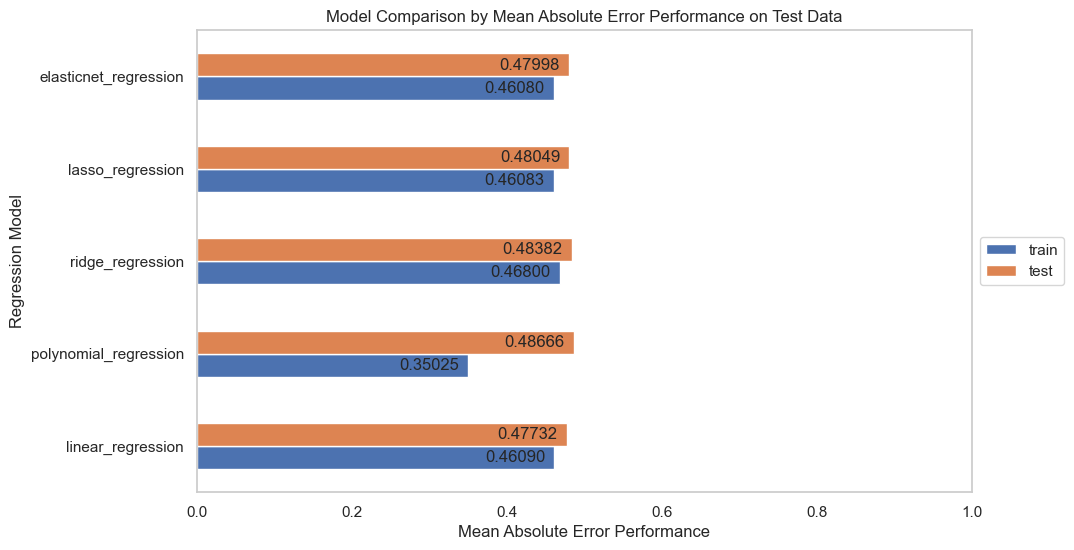

In [197]:
##################################
# Plotting all the MAE
# model performance measures
# between train and test sets
##################################
performance_comparison_MAE_plot = pd.DataFrame({'train': performance_comparison_MAE_train.values,
                                                'test': performance_comparison_MAE_test.values},
                                               index=performance_comparison_MAE['model'].unique())
performance_comparison_MAE_plot = performance_comparison_MAE_plot.plot.barh(figsize=(10, 6))
performance_comparison_MAE_plot.set_xlim(0.00,1.00)
performance_comparison_MAE_plot.set_title("Model Comparison by Mean Absolute Error Performance on Test Data")
performance_comparison_MAE_plot.set_xlabel("Mean Absolute Error Performance")
performance_comparison_MAE_plot.set_ylabel("Regression Model")
performance_comparison_MAE_plot.grid(False)
performance_comparison_MAE_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in performance_comparison_MAE_plot.containers:
    performance_comparison_MAE_plot.bar_label(container, fmt='%.5f', padding=-50)

# 2. Summary <a class="anchor" id="Summary"></a>

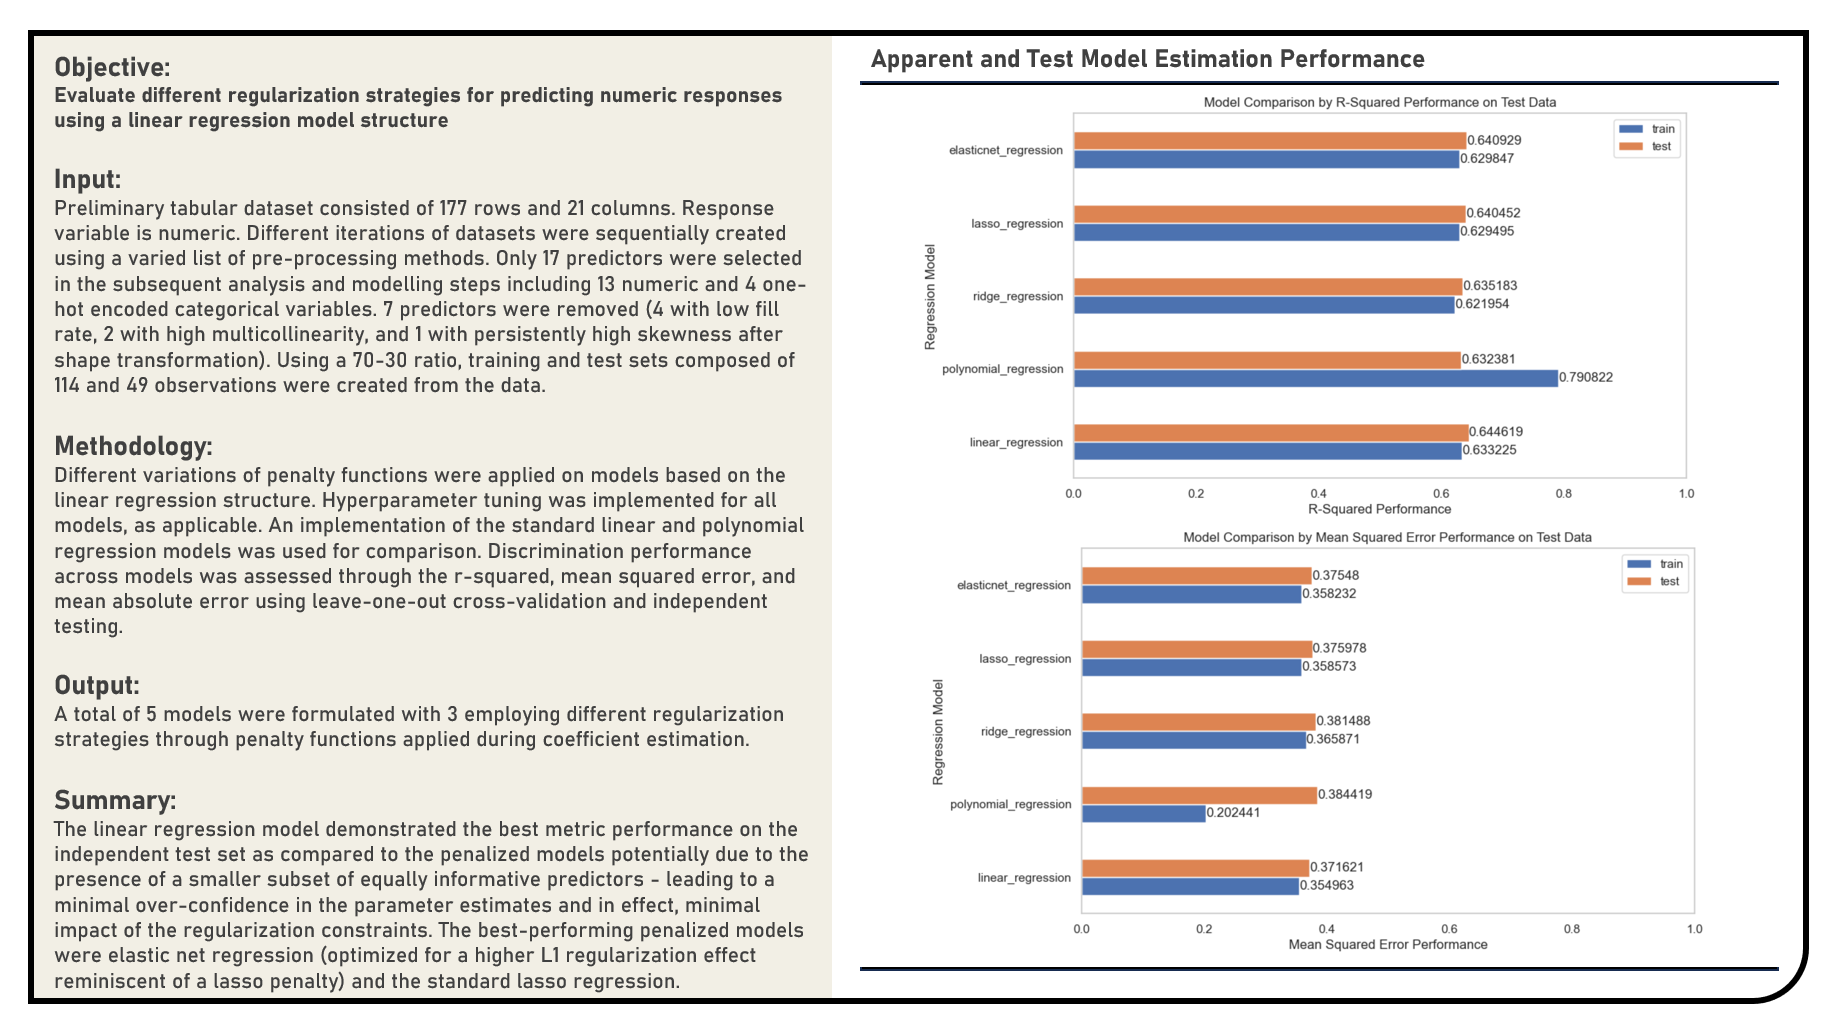

# 3. References <a class="anchor" id="References"></a>
* **[Book]** [Data Preparation for Machine Learning: Data Cleaning, Feature Selection, and Data Transforms in Python](https://machinelearningmastery.com/data-preparation-for-machine-learning/) by Jason Brownlee
* **[Book]** [Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson
* **[Book]** [Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/) by Alice Zheng and Amanda Casari
* **[Book]** [Applied Predictive Modeling](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) by Max Kuhn and Kjell Johnson
* **[Book]** [Data Mining: Practical Machine Learning Tools and Techniques](https://www.sciencedirect.com/book/9780123748560/data-mining-practical-machine-learning-tools-and-techniques?via=ihub=) by Ian Witten, Eibe Frank, Mark Hall and Christopher Pal 
* **[Book]** [Data Cleaning](https://dl.acm.org/doi/book/10.1145/3310205) by Ihab Ilyas and Xu Chu
* **[Book]** [Data Wrangling with Python](https://www.oreilly.com/library/view/data-wrangling-with/9781491948804/) by Jacqueline Kazil and Katharine Jarmul
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [operator](https://docs.python.org/3/library/operator.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) by Scikit-Learn Team
* **[Python Library API]** [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.pipeline](https://scikit-learn.org/stable/modules/compose.html) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Article]** [Step-by-Step Exploratory Data Analysis (EDA) using Python](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20with,distributions%20using%20Python%20programming%20language.) by Malamahadevan Mahadevan (Analytics Vidhya)
* **[Article]** [Exploratory Data Analysis in Python — A Step-by-Step Process](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee) by Andrea D'Agostino (Towards Data Science)
* **[Article]** [Exploratory Data Analysis with Python](https://medium.com/@douglas.rochedo/exploratory-data-analysis-with-python-78b6c1d479cc) by Douglas Rocha (Medium)
* **[Article]** [4 Ways to Automate Exploratory Data Analysis (EDA) in Python](https://builtin.com/data-science/EDA-python) by Abdishakur Hassan (BuiltIn)
* **[Article]** [10 Things To Do When Conducting Your Exploratory Data Analysis (EDA)](https://www.analyticsvidhya.com) by Alifia Harmadi (Medium)
* **[Article]** [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Statistical Imputation for Missing Values in Machine Learning](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Imputing Missing Data with Simple and Advanced Techniques](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87) by Idil Ismiguzel (Towards Data Science)
* **[Article]** [Missing Data Imputation Approaches | How to handle missing values in Python](https://www.machinelearningplus.com/machine-learning/missing-data-imputation-how-to-handle-missing-values-in-python/) by Selva Prabhakaran (Machine Learning +)
* **[Article]** [Master The Skills Of Missing Data Imputation Techniques In Python(2022) And Be Successful](https://medium.com/analytics-vidhya/a-quick-guide-on-missing-data-imputation-techniques-in-python-2020-5410f3df1c1e) by Mrinal Walia (Analytics Vidhya)
* **[Article]** [How to Preprocess Data in Python](https://builtin.com/machine-learning/how-to-preprocess-data-python) by Afroz Chakure (BuiltIn)
* **[Article]** [Easy Guide To Data Preprocessing In Python](https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html) by Ahmad Anis (KDNuggets)
* **[Article]** [Data Preprocessing in Python](https://towardsdatascience.com/data-preprocessing-in-python-b52b652e37d5) by Tarun Gupta (Towards Data Science)
* **[Article]** [Data Preprocessing using Python](https://medium.com/@suneet.bhopal/data-preprocessing-using-python-1bfee9268fb3) by Suneet Jain (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.com/@abonia/data-preprocessing-in-python-1f90d95d44f4) by Abonia Sojasingarayar (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.datadriveninvestor.com/data-preprocessing-3cd01eefd438) by Afroz Chakure (Medium)
* **[Article]** [Detecting and Treating Outliers | Treating the Odd One Out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/) by Harika Bonthu (Analytics Vidhya)
* **[Article]** [Outlier Treatment with Python](https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02) by Sangita Yemulwar (Analytics Vidhya)
* **[Article]** [A Guide to Outlier Detection in Python](https://builtin.com/data-science/outlier-detection-python) by Sadrach Pierre (BuiltIn)
* **[Article]** [How To Find Outliers in Data Using Python (and How To Handle Them)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/) by Eric Kleppen (Career Foundry)
* **[Article]** [Statistics in Python — Collinearity and Multicollinearity](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f) by Wei-Meng Lee (Towards Data Science)
* **[Article]** [Understanding Multicollinearity and How to Detect it in Python](https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc) by Terence Shin (Towards Data Science)
* **[Article]** [A Python Library to Remove Collinearity](https://www.yourdatateacher.com/2021/06/28/a-python-library-to-remove-collinearity/) by Gianluca Malato (Your Data Teacher)
* **[Article]** [8 Best Data Transformation in Pandas](https://ai.plainenglish.io/data-transformation-in-pandas-29b2b3c61b34) by Tirendaz AI (Medium)
* **[Article]** [Data Transformation Techniques with Python: Elevate Your Data Game!](https://medium.com/@siddharthverma.er.cse/data-transformation-techniques-with-python-elevate-your-data-game-21fcc7442cc2) by Siddharth Verma (Medium)
* **[Article]** [Data Scaling with Python](https://www.kdnuggets.com/2023/07/data-scaling-python.html) by Benjamin Obi Tayo (KDNuggets)
* **[Article]** [How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Feature Engineering: Scaling, Normalization, and Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) by Aniruddha Bhandari  (Analytics Vidhya)
* **[Article]** [How to Normalize Data Using scikit-learn in Python](https://www.digitalocean.com/community/tutorials/normalize-data-in-python) by Jayant Verma (Digital Ocean)
* **[Article]** [What are Categorical Data Encoding Methods | Binary Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/) by Shipra Saxena  (Analytics Vidhya)
* **[Article]** [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html) by Chris Moffitt (Practical Business Python)
* **[Article]** [Categorical Data Encoding Techniques in Python: A Complete Guide](https://soumenatta.medium.com/categorical-data-encoding-techniques-in-python-a-complete-guide-a913aae19a22) by Soumen Atta (Medium)
* **[Article]** [Categorical Feature Encoding Techniques](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24) by Tara Boyle (Medium)
* **[Article]** [Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Hypothesis Testing with Python: Step by Step Hands-On Tutorial with Practical Examples](https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e) by Ece Işık Polat (Towards Data Science)
* **[Article]** [17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [A Step-by-Step Guide to Hypothesis Testing in Python using Scipy](https://medium.com/@gabriel_renno/a-step-by-step-guide-to-hypothesis-testing-in-python-using-scipy-8eb5b696ab07) by Gabriel Rennó (Medium)
* **[Publication]** [Ridge Regression: Biased Estimation for Nonorthogonal Problems](https://www.tandfonline.com/doi/abs/10.1080/00401706.1970.10488634) by Arthur Hoerl and Robert Kennard (Technometrics)
* **[Publication]** [Regression Shrinkage and Selection Via the Lasso](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1996.tb02080.x) by Rob Tibshirani (Journal of the Royal Statistical Society)
* **[Publication]** [ Regularization and Variable Selection via the Elastic Net](https://rss.onlinelibrary.wiley.com/doi/10.1111/j.1467-9868.2005.00503.x) by Hui Zou and Trevor Hastie (Journal of the Royal Statistical Society)

***

In [198]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))